In [2]:
# do imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import pandas as pd
# this is for hierarchical clustering
import scipy.spatial
import scipy.cluster
import cimcb_lite as cb

In [341]:
df = pd.read_excel('tomato_metabolites.xlsx')


0     BIG
1     BIG
2     BIG
3     BIG
4     BIG
5     BIG
6     BIG
7     BIG
8     BIG
9     BIG
10    BIG
11    BIG
12    CER
13    PIM
14    PIM
15    PIM
16    PIM
17    PIM
18    PIM
19    PIM
20    PIM
21    PIM
22    PIM
23    PIM
24    CER
25    CER
26    CER
27    CER
28    CER
29    CER
30    CER
31    CER
32    CER
33    CER
34    CER
35    CER
36    CER
37    CER
38    CER
39    CER
40    BIG
41    BIG
42    BIG
43    BIG
44    BIG
45    BIG
46    BIG
47    BIG
48    BIG
49    PIM
Name: Group, dtype: object

In [374]:
df_variants = pd.read_excel('tomato_varieties.xlsx')
df_variants = df_variants[['Individual code', 'Group']]

In [391]:
metab_list = df.columns[2:]                # Set peaklist to the metabolite names in the peakTableClean
metab_list

Index(['SlFM0001', 'SlFM0002', 'SlFM0003', 'SlFM0004', 'SlFM0006', 'SlFM0007',
       'SlFM0008', 'SlFM0009', 'SlFM0010', 'SlFM0011',
       ...
       'SlFM1991', 'SlFM1992', 'SlFM1993', 'SlFM1994', 'SlFM1995', 'SlFM1996',
       'SlFM1997', 'SlFM1998', 'SlFM1999', 'SlFM2000'],
      dtype='object', length=980)

In [376]:
df_rep1 = df[df['Replicate'] == 1]
df_rep2 = df[df['Replicate'] == 2]

In [377]:
total_measurements = df_rep1.shape[0] * df_rep1.shape[1]
missing_rep1 = np.sum(np.sum(df_rep1.isnull()))*100
missing_rep2 = np.sum(np.sum(df_rep2.isnull()))*100
print('Replicate 1 missing {0:.1f}% and replicate 2 missing {1:.2f}%'.format( missing_rep1/total_measurements, missing_rep2/total_measurements))

Replicate 1 missing 1.4% and replicate 2 missing 2.31%


ValueError: x and y must be the same size

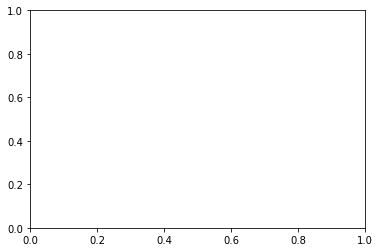

In [483]:
df_final = df_variants.merge(df, right_on = 'Accessions', left_on = 'Individual code')
df_final1 = df_variants.merge(df_rep1, right_on = 'Accessions', left_on = 'Individual code')
df_final2 = df_variants.merge(df_rep2, right_on = 'Accessions', left_on = 'Individual code')
plt.scatter(df_final.iloc[:, 4:].values.ravel(), df_final2.iloc[:, 4:].values.ravel())

In [401]:
#knn imputation of missing values

from sklearn.impute import KNNImputer

X = df.iloc[:, 2:]
imputer = KNNImputer(n_neighbors=2)
Xknn = imputer.fit_transform(X)
df_imputed = pd.DataFrame(data = Xknn, columns = metab_list)
# df_imputed[metab_list].values = Xknn
df_imputed


SlFM0001    SlFM0002     SlFM0003    SlFM0004     SlFM0006  \
0    27272.2500   7524.2000   9907.55000  52315.5500  184169.6502   
1     6410.8000   8084.8000  11651.00000  13935.6500  224168.1084   
2     4304.3000   8592.4500   1583.85000   3226.0000  186806.5001   
3    24844.8500   9163.8000   5471.45000  23689.1000  461896.9999   
4     9819.7500   8602.2000  10360.50000   6516.4500  187771.8005   
..          ...         ...          ...         ...          ...   
879   1024.1339  15674.8370   6543.47440    713.4160   25263.0431   
880   1416.6685   6980.8179   2810.40910    537.1689   31818.4051   
881    438.0220   3787.6969   2214.42270   1923.8061   19143.4676   
882   1117.9950  15128.7994   3521.23755    673.8754   18180.2009   
883   2061.0690   6328.4684   2230.99950    277.2414   18806.0415   

        SlFM0007     SlFM0008    SlFM0009     SlFM0010     SlFM0011  ...  \
0    469608.0716  118913.1213  13682.9000  122941.5003   56750.8500  ...   
1    376843.8492   54469.3201   6210.2500   36130.5103   34361.6430  ...   
2    268954.7998   29407.7134   4134.8000    6032.2157    6169.5372  ...   
3    425660.4489  169292.5499   5215.1000  100268.9997   90364.0499  ...   
4    231472.4006   67163.1000   7501.8000   51584.8500   59064.4498  ...   
..           ...          ...         ...          ...          ...  ...   
879  232780.1655  165998.1203  32565.1276  192395.6267  172766.2287  ...   
880  133001.0565   71476.1923  10509.2662   26594.6314   58188.4251  ...   
881  173469.9317  235927.9554  24402.5192   66113.8088  221739.2395  ...   
882  203976.3198  188506.9148  20064.3304   67776.9441  156319.2982  ...   
883  197917.3413  272818.0684  28283.8548  406662.1633  213149.0412  ...   

         SlFM1991     SlFM1992     SlFM1993     SlFM1994   SlFM1995  \
0    2.266619e+05   14801.2000   15750.3000   80612.2997  457.92805   
1    2.528615e+04   63863.6500    3841.8000   13982.2500  925.65985   
2    2.530525e+05   31536.8000   17666.8000   28321.3999  745.26995   
3    1.060233e+05   64864.1500   12554.3000   24752.0000  429.37365   
4    2.230120e+04    4946.4500    5866.3000   17261.8500  349.93665   
..            ...          ...          ...          ...        ...   
879  1.620856e+07  927503.5962  292365.2906    3478.3260  362.44650   
880  1.559524e+05   69637.5613  105033.1384  112663.5656  702.64450   
881  2.665473e+05  325115.0441   30883.6064   79619.9337  529.02220   
882  2.800164e+04   49673.8518   11542.2988   31712.1682  355.66065   
883  4.976020e+04   21924.0027    9918.8819    5244.0558  718.60850   

        SlFM1996     SlFM1997   SlFM1998     SlFM1999      SlFM2000  
0     48292.7999   20794.9000  3465.6500   85502.7499  6.060375e+05  
1     35917.8999   19905.3500  3201.3000   95892.0000  5.537594e+05  
2     63002.5499   38525.7499  3197.0000   89135.5502  6.466950e+05  
3     56587.8498   27110.5000  4263.3500  103855.9999  6.140405e+05  
4     16576.7500   11827.1000  2663.3000   42785.6501  2.820534e+05  
..           ...          ...        ...          ...           ...  
879   60267.8250    7698.0752  2447.5941   56833.4006  6.828172e+05  
880  800452.6841  200847.3457  9465.2746  650659.5221  1.000871e+06  
881  709818.6868  181926.3852  5936.2610  522218.5972  1.341707e+06  
882  196670.0640   51841.5966  5889.3047  231417.7052  1.081862e+06  
883  115725.9764   28660.0769   705.8536   56438.5237  3.279704e+05  

[884 rows x 980 columns]

In [409]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = df_imputed.values

# Separating out the target
#y = df_log.loc[:,['Group']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [410]:
principalDf

principal component 1  principal component 2
0                -4.041728              -4.164218
1                -6.594842              -4.372173
2                -2.506278              -0.783525
3                -4.151777              -3.670725
4                -7.056235              -5.560727
..                     ...                    ...
879             -14.639697               2.638720
880             -11.714437              14.563083
881             -12.007599              10.958988
882             -16.553354              -2.595219
883             -17.902511              -4.901114

[884 rows x 2 columns]

In [426]:
df_groups = (df_final['Group'].append(df_final['Group']))

KeyError: 'Group'

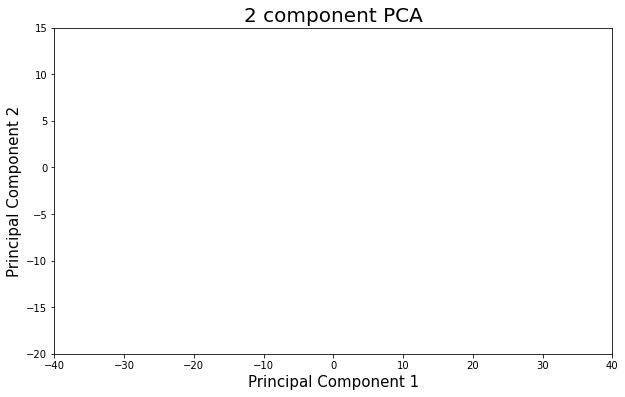

In [428]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.set_xlim(-40, 40)
ax.set_ylim(-20, 15)

#ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
groups = ['BIG', 'CER', 'PIM']
colors = ['orange', 'darkgreen', 'mediumblue']
for group, color in zip(groups,colors):
    indicesToKeep = df_groups['Group'] == group
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(groups)
ax.grid()

Accessions  Replicate    SlFM0001    SlFM0002     SlFM0003    SlFM0004  \
0         TS-1          1  27272.2500   7524.2000   9907.55000  52315.5500   
1         TS-2          1   4304.3000   8592.4500   1583.85000   3226.0000   
2         TS-3          1   9819.7500   8602.2000  10360.50000   6516.4500   
3         TS-4          1   3609.2000   8467.8500   5707.75000   2497.0500   
4         TS-5          1   1785.9500  12240.9000   1717.35000    918.0000   
..         ...        ...         ...         ...          ...         ...   
437     TS-700          1   2560.9986  20995.2438   3814.68000    907.6987   
438     TS-701          1   1561.4447  26692.6709  11796.88600   6916.8517   
439     TS-702          1   1770.4821  17655.9284   1815.82250   1857.5604   
440     TS-731          1   1416.6685   6980.8179   2810.40910    537.1689   
441     TS-739          1   1117.9950  15128.7994   3521.23755    673.8754   

        SlFM0006     SlFM0007     SlFM0008    SlFM0009  ...     SlFM1991  \
0    184169.6502  469608.0716  118913.1213  13682.9000  ...  226661.8999   
1    186806.5001  268954.7998   29407.7134   4134.8000  ...  253052.4506   
2    187771.8005  231472.4006   67163.1000   7501.8000  ...   22301.2000   
3    242597.5004  184647.9001   57663.5005  21081.6501  ...  186358.6501   
4    259364.4494  268895.9499   91053.7365   7835.6000  ...   44177.4501   
..           ...          ...          ...         ...  ...          ...   
437   51476.1809  255126.3702  340319.0770  70309.6479  ...  100098.3439   
438   22104.7405  191492.5195   80602.3957   4156.4610  ...   32542.1694   
439   22525.2995  180451.2773  107633.0122  13317.7056  ...  196993.9312   
440   31818.4051  133001.0565   71476.1923  10509.2662  ...  155952.3568   
441   18180.2009  203976.3198  188506.9148  20064.3304  ...   28001.6440   

        SlFM1992     SlFM1993     SlFM1994    SlFM1995     SlFM1996  \
0     14801.2000   15750.3000   80612.2997   457.92805   48292.7999   
1     31536.8000   17666.8000   28321.3999   745.26995   63002.5499   
2      4946.4500    5866.3000   17261.8500   349.93665   16576.7500   
3     42204.2501   43757.1999   65189.5502  1177.70000  231917.5995   
4     57045.5999    9121.7000   42807.8999   745.26995   29783.3501   
..           ...          ...          ...         ...          ...   
437  113718.3480   39059.2685    7013.8265   358.91565  256750.6423   
438   80028.5467   28321.1141   13761.3355   362.73880  188398.4121   
439   50524.5298   15552.8130   37527.7496   544.13765  306636.7294   
440   69637.5613  105033.1384  112663.5656   702.64450  800452.6841   
441   49673.8518   11542.2988   31712.1682   355.66065  196670.0640   

        SlFM1997   SlFM1998     SlFM1999      SlFM2000  
0     20794.9000  3465.6500   85502.7499  6.060375e+05  
1     38525.7499  3197.0000   89135.5502  6.466950e+05  
2     11827.1000  2663.3000   42785.6501  2.820534e+05  
3    127360.5998  5584.6000  247797.2000  1.775111e+06  
4     32206.2001  2142.6500  118207.6001  6.123521e+05  
..           ...        ...          ...           ...  
437   51788.8829  3797.8295  132945.3213  7.110118e+05  
438   42829.8160  2083.4261  130173.3893  6.216019e+05  
439   76940.1616  2451.5985  205228.1051  1.232852e+06  
440  200847.3457  9465.2746  650659.5221  1.000871e+06  
441   51841.5966  5889.3047  231417.7052  1.081862e+06  

[442 rows x 982 columns]

In [323]:
df_log = df_final.iloc[:, 6:].apply(np.log2)
df_log2 = df_final2.iloc[:, 6:].apply(np.log2)


SlFM0001   SlFM0002   SlFM0003   SlFM0004   SlFM0006   SlFM0007  \
0    14.735146  12.877322  13.274313  15.674952  17.490676  18.841098   
1     9.965784  13.750975  12.047902   9.395965  16.309532  17.930181   
2    12.646289  12.980996  13.508166  13.766493  17.774222  18.523607   
3     8.524383  13.776051  10.972566   9.965784  16.112739  18.022671   
4    12.071563  13.068854  10.629220  11.655531  17.511185  18.037004   
..         ...        ...        ...        ...        ...        ...   
879   8.774860  11.887105  11.112715  10.909748  14.224565  17.404326   
880  19.141506  14.904613  18.430946  21.670588  17.310216  19.714207   
881   9.965784  13.885010   9.965784   9.396338  14.150081  17.638042   
882  19.366083  14.376800  17.854766  22.133939  17.667356  19.642544   
883  11.009177  12.627641  11.123474   8.114999  14.198909  17.594538   

      SlFM0008   SlFM0009   SlFM0010   SlFM0011  ...   SlFM1991   SlFM1992  \
0    16.859548  13.740086  16.907612  15.792354  ...  17.790182  13.853427   
1    16.499409  12.336912  15.646543  16.209047  ...  17.821242  14.176604   
2    15.733156  12.600436  15.140930  15.068511  ...  14.626060  15.962707   
3    16.880783  13.871351  16.867821  16.443515  ...  14.906582  16.128613   
4    14.843907  12.013602  12.558472  12.590947  ...  17.949077  14.944749   
..         ...        ...        ...        ...  ...        ...        ...   
879  17.847987  14.574742  16.012664  17.758505  ...  18.024032  18.310591   
880  20.844078  18.159752  18.856177  20.624303  ...  15.616688  16.006269   
881  17.524258  14.292345  16.048507  17.254136  ...  14.773224  15.600199   
882  20.744041  18.232976  21.084346  20.360903  ...  16.165651  14.858797   
883  18.057580  14.787691  18.633471  17.701503  ...  15.602705  14.420224   

      SlFM1993   SlFM1994  SlFM1995   SlFM1996   SlFM1997   SlFM1998  \
0    13.943092  16.298712  9.965784  15.559520  14.343942  11.758910   
1    14.397086  15.430668  9.965784  17.295679  15.404347  11.445918   
2    11.907567  13.771309  9.965784  15.132415  14.280869  11.644442   
3    12.706134  13.437172  8.503090  16.539596  14.414086  10.763034   
4    14.108753  14.789605  9.965784  15.943123  15.233535  11.642503   
..         ...        ...       ...        ...        ...        ...   
879  14.914554  16.280842  9.965784  19.437091  17.472995  12.535339   
880  13.041590  17.058959  9.204938  16.609713  17.216802  13.304337   
881  13.494643  14.952749  9.965784  17.585418  15.661823  12.523882   
882  13.644498  14.018969  9.965784  15.964406  15.993549  11.061574   
883  13.275962  12.356467  9.965784  16.820353  14.806755   9.463225   

      SlFM1999   SlFM2000  
0    16.383683  19.209048  
1    16.955778  19.669818  
2    16.549123  19.078900  
3    16.978190  19.257916  
4    16.443713  19.302726  
..         ...        ...  
879  18.994294  20.355638  
880  18.180957  20.884497  
881  17.820140  20.045085  
882  16.785396  19.563011  
883  15.784393  18.323206  

[884 rows x 980 columns]

In [324]:
df_logmean = ((df_log + df_log2)/2)
#go back and replace with real values!!!

In [325]:
df_logmean

SlFM0001   SlFM0002   SlFM0003   SlFM0004   SlFM0006   SlFM0007  \
0    13.690717  12.929159  13.391239  14.720722  17.632449  18.682352   
1    13.336111  13.115292  11.523464  13.093733  18.164198  18.368174   
2    12.958400  13.060339  12.143879  12.293369  17.547690  18.303061   
3    13.435625  12.947698  12.735552  12.872975  17.954121  18.067371   
4    11.923298  13.580473  10.742874  10.939236  17.893728  18.440114   
..         ...        ...        ...        ...        ...        ...   
437  10.852248  14.160728  12.564884  10.787864  15.361086  18.005413   
438   9.850464  14.167488  13.363796  11.527548  15.293995  17.581483   
439  10.395058  14.022014  11.751124  10.168897  14.542000  17.644929   
440   9.621573  12.328143  11.284640   9.989490  14.591069  17.212702   
441  10.567938  13.256325  11.452671   8.755668  14.174495  17.616290   

      SlFM0008   SlFM0009   SlFM0010   SlFM0011  ...   SlFM1991   SlFM1992  \
0    16.296352  13.170261  16.024271  15.430433  ...  16.208121  14.908067   
1    16.106533  12.181041  14.585994  14.527204  ...  17.321549  15.464941   
2    16.429661  13.522466  16.213345  16.279646  ...  15.237630  13.907000   
3    15.267915  13.278035  14.382963  16.124126  ...  16.893197  15.279885   
4    16.714633  12.569489  16.180123  15.434836  ...  15.650488  15.655002   
..         ...        ...        ...        ...  ...        ...        ...   
437  18.469378  15.652316  18.398790  18.362269  ...  16.038551  15.719924   
438  17.052686  13.255316  17.530742  16.859911  ...  14.538768  16.039394   
439  17.028284  14.346049  16.731543  17.093383  ...  20.769022  17.723845   
440  16.986581  13.967058  15.355756  16.793475  ...  17.637389  17.199084   
441  17.790919  14.540018  17.340989  17.477820  ...  15.187964  15.010211   

      SlFM1993   SlFM1994  SlFM1995   SlFM1996   SlFM1997   SlFM1998  \
0    12.925329  15.035011  9.346658  15.345968  14.312405  11.701676   
1    13.862324  14.692431  9.143855  15.865664  14.980050  11.850137   
2    12.487539  15.392918  8.859704  14.870321  14.472165  11.671670   
3    14.059183  14.828422  9.662937  16.383993  16.188628  12.044995   
4    12.865313  15.682865  9.405038  15.114922  15.068643  11.853763   
..         ...        ...       ...        ...        ...        ...   
437  14.559626  13.161690  8.486930  17.828929  15.609897  11.559768   
438  17.587684  13.039705  8.475696  17.152826  15.089055  10.886795   
439  16.041150  13.479924  8.794726  17.052636  14.570866  11.258328   
440  15.797519  16.531252  9.251918  19.523774  17.544368  12.871884   
441  13.385302  13.654608  8.981710  17.202886  15.234289  10.993553   

      SlFM1999   SlFM2000  
0    16.466403  19.143974  
1    16.553969  19.265350  
2    16.494746  19.126006  
3    17.445791  20.127325  
4    16.998926  19.523499  
..         ...        ...  
437  16.794205  19.312477  
438  16.573227  17.235018  
439  16.720660  19.807354  
440  19.152919  20.144232  
441  16.802266  19.184146  

[442 rows x 980 columns]

SlFM0001  SlFM0002  SlFM0003  SlFM0004  SlFM0006  SlFM0007  SlFM0008  \
0    4.435721  3.876460  3.995966  4.718631  5.265218  5.671736  5.075230   
1    3.806912  3.907669  4.066363  4.144127  5.350574  5.576161  4.736152   
2    3.633903  3.934117  3.199714  3.508664  5.271392  5.429679  4.468461   
3    4.395236  3.962076  3.738102  4.374549  5.664545  5.629063  5.228638   
4    3.992100  3.934610  4.015381  3.814011  5.273630  5.364499  4.827131   
..        ...       ...       ...       ...       ...       ...       ...   
437  5.872258  4.399961  5.905110  6.603856  5.154665  5.875676  6.345995   
438  5.855673  4.486409  5.778378  6.512496  5.198638  5.752443  6.351461   
439  5.916584  4.488355  5.723370  6.654636  5.255805  5.733158  6.472058   
440  5.762167  4.486736  5.548268  6.523497  5.210894  5.934568  6.274693   
441  5.829772  4.327848  5.374820  6.662980  5.318404  5.912995  6.244579   

     SlFM0009  SlFM0010  SlFM0011  ...  SlFM1991  SlFM1992  SlFM1993  \
0    4.136178  5.089699  4.753972  ...  5.355379  4.170297  4.197289   
1    3.793109  4.557874  4.536074  ...  4.402883  4.805254  3.584535   
2    3.616455  3.780477  3.790253  ...  5.403211  4.498818  4.247158   
3    3.717263  5.001167  4.955996  ...  5.025401  4.812005  4.098793   
4    3.875165  4.712522  4.771326  ...  4.348328  3.694294  3.768364   
..        ...       ...       ...  ...       ...       ...       ...   
437  5.613860  6.303497  6.321107  ...  7.246459  5.882695  5.489545   
438  5.505678  5.819518  6.302442  ...  5.520328  5.092522  5.065327   
439  5.724857  5.856406  6.380281  ...  5.544001  5.409944  4.325007   
440  5.466630  5.676275  6.208534  ...  4.701092  4.818367  3.925910   
441  5.488673  6.347020  6.129242  ...  4.866346  4.472944  4.107403   

     SlFM1994  SlFM1995  SlFM1996  SlFM1997  SlFM1998  SlFM1999  SlFM2000  
0    4.906401  3.000000  4.683882  4.317957  3.539785  4.931980  5.782499  
1    4.145577  3.000000  4.555311  4.298970  3.505326  4.981782  5.743321  
2    4.452115  3.000000  4.799358  4.585751  3.504743  4.950051  5.810700  
3    4.393610  3.000000  4.752723  4.433138  3.629751  5.016432  5.788197  
4    4.237087  3.000000  4.219499  4.072878  3.425420  4.631298  5.450331  
..        ...       ...       ...       ...       ...       ...       ...  
437  4.078709  3.000000  4.556778  3.905002  3.541978  4.676302  6.031214  
438  5.590878  3.000000  3.926314  5.738259  4.340653  6.027315  6.781001  
439  5.324066  3.000000  3.888979  5.649621  4.004781  5.717487  6.505710  
440  5.135258  2.770962  5.000022  5.182774  4.005005  5.473013  6.286860  
441  4.220130  3.000000  4.805765  4.814538  3.329865  5.052908  5.889053  

[442 rows x 980 columns]

In [141]:
df_final['Group'].append(df_final['Group']).shape

(884,)

PCA1      PCA2
0    0.049994 -0.049105
1    0.048664 -0.044239
2    0.050154 -0.047947
3    0.047941 -0.043220
4    0.050419 -0.044541
..        ...       ...
437  0.049889  0.056265
438  0.050258  0.055904
439  0.047983  0.055563
440  0.044461  0.054811
441  0.049397  0.056787

[442 rows x 2 columns]

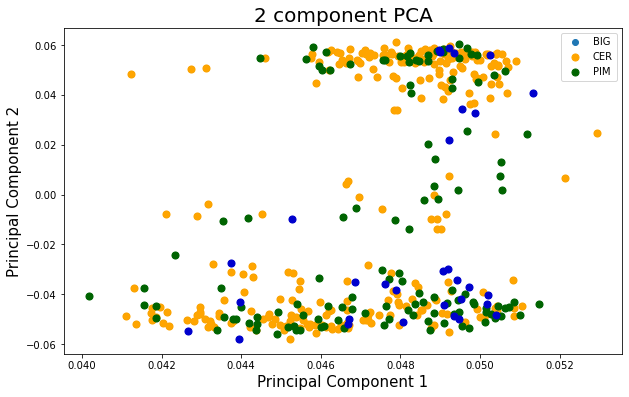

In [436]:
ax.set_xlim(-40, 40)
ax.set_ylim(-20, 15)
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(prindf['PCA1'], prindf['PCA2'])
groups = df_final['Group'].unique()
colors = ['orange', 'darkgreen', 'mediumblue']
for group, color in zip(groups,colors):
    indicesToKeep = df_final['Group'] == group
    ax.scatter(prindf.loc[indicesToKeep, 'PCA1']
               , prindf.loc[indicesToKeep, 'PCA2']
               , c = color
               , s = 50)
ax.legend(groups)

In [336]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [337]:
finalDf = principalDf
finalDf['Group'] = accessions

NameError: name 'accessions' is not defined

KeyError: 'Group'

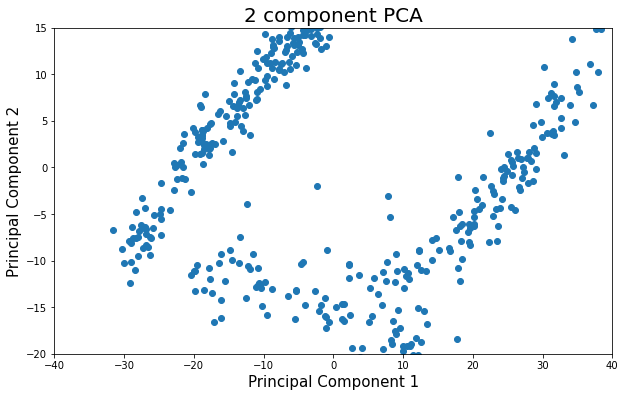

In [338]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.set_xlim(-40, 40)
ax.set_ylim(-20, 15)

ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
groups = df_final['Group'].unique()
colors = ['orange', 'darkgreen', 'mediumblue']
for group, color in zip(groups,colors):
    indicesToKeep = df_final['Group'] == group
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(groups)
ax.grid()

In [379]:
principalDf.set_index(df_final.index, inplace = True)
finalDf = pd.concat([principalDf, df_final['Group']], axis = 1)
finalDf

principal component 1  principal component 2 Group
0                 7.046455               3.804988   BIG
1                13.476351               3.540774   BIG
2                 7.125340              -0.746810   BIG
3                10.193568               0.218651   BIG
4                14.386126               6.866463   BIG
..                     ...                    ...   ...
437             -22.062859              -8.003403   BIG
438             -20.245300             -23.089818   PIM
439             -19.840027             -17.640498   CER
440             -19.766824               1.916336   CER
441             -20.826212               5.155244   BIG

[442 rows x 3 columns]

NameError: name 'finalDf' is not defined

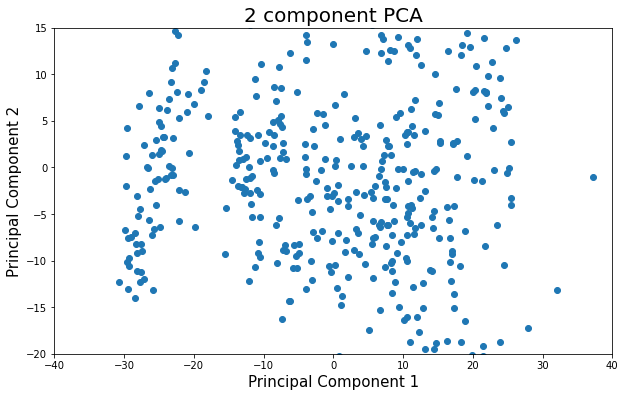

In [96]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.set_xlim(-40, 40)
ax.set_ylim(-20, 15)

ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
groups = df_final['Group'].unique()
colors = ['orange', 'darkgreen', 'mediumblue']
for group, color in zip(groups,colors):
    indicesToKeep = df_final['Group'] == group
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(groups)
ax.grid()

In [18]:
cl = scipy.cluster.hierarchy.linkage(df_values.values, metric='correlation', optimal_ordering=True)
plt.figure(figsize=(25,5))
#result = scipy.cluster.hierarchy.dendrogram(cl, labels=list(np.arange(R.shape[0])), truncate_mode='none')

ValueError: The condensed distance matrix must contain only finite values.

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


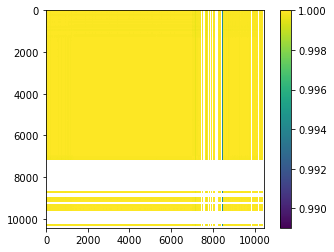

In [19]:
# compute correlation coefficient
R = np.corrcoef(df_values.values)
plt.imshow(R);
plt.colorbar();

In [306]:
one = df[df['Replicate'] == 1].iloc[:10, :10]
one.set_index("Accessions", inplace = True)
one

Replicate    SlFM0001  SlFM0002  SlFM0003  SlFM0004     SlFM0006  \
Accessions                                                                     
TS-1                1  27272.2500   7524.20   9907.55  52315.55  184169.6502   
TS-2                1   6410.8000   8084.80  11651.00  13935.65  224168.1084   
TS-3                1   4304.3000   8592.45   1583.85   3226.00  186806.5001   
TS-4                1  24844.8500   9163.80   5471.45  23689.10  461896.9999   
TS-5                1   9819.7500   8602.20  10360.50   6516.45  187771.8005   
TS-6                1   6451.1000   8482.00   1976.80   3866.65  195493.1498   
TS-7                1   3609.2000   8467.85   5707.75   2497.05  242597.5004   
TS-8                1  34012.6999   7370.85   8148.95  22535.95  265810.2496   
TS-9                1   1785.9500  12240.90   1717.35    918.00  259364.4494   
TS-10               1   8446.4000  12258.75   1710.00   4199.85  228658.4502   

               SlFM0007     SlFM0008    SlFM0009  
Accessions                                        
TS-1        469608.0716  118913.1213  13682.9000  
TS-2        376843.8492   54469.3201   6210.2500  
TS-3        268954.7998   29407.7134   4134.8000  
TS-4        425660.4489  169292.5499   5215.1000  
TS-5        231472.4006   67163.1000   7501.8000  
TS-6        451899.3512  116014.0999  18457.4000  
TS-7        184647.9001   57663.5005  21081.6501  
TS-8        408598.7486   26996.0146   4680.2500  
TS-9        268895.9499   91053.7365   7835.6000  
TS-10       470403.9014  127032.3003   4715.3500

Replicate   SlFM0001    SlFM0002   SlFM0003   SlFM0004  \
Accessions                                                           
TS-1                2        NaN  13786.5620  4234.2838   673.7013   
TS-2                2   368.2094  14028.2874  2009.4234        NaN   
TS-3                2   779.6869   8857.1357  7435.6603   534.0635   
TS-4                2        NaN  23947.4802  2613.9393        NaN   
TS-5                2  1266.8837  11941.3712  2286.2186   561.7518   
TS-6                2        NaN  28916.6623  7477.5037   509.6627   
TS-7                2   331.5183   7878.2115  2932.9017   286.2488   
TS-8                2   333.9729  14594.3220  3131.9123   170.8620   
TS-9                2        NaN  10643.9912  2575.9081   517.0250   
TS-10               2  1254.7004  19557.2332  4133.0365  1272.2098   

               SlFM0006     SlFM0007     SlFM0008    SlFM0009  
Accessions                                                     
TS-1         81219.1203  249759.6387   92643.9362   5173.4525  
TS-2         70862.7209  266296.0438  120676.3056  14986.2420  
TS-3         34856.9380  209394.6099  158093.3107  22488.0792  
TS-4         97503.2955  321174.0464   95854.4142  12240.5901  
TS-5         24961.6770  162348.2885   43015.2312   6463.1005  
TS-6         67864.6916  364524.5841   69882.5518   3672.9962  
TS-7         78840.5762  192689.5851   79138.9734  10374.6347  
TS-8         82358.9194  478063.8927   49001.7299   2016.2503  
TS-9        102312.3893  204685.9328   61838.2174   9214.0988  
TS-10        75944.7466  406189.6124   62320.4288   8841.4335

In [312]:
one.add(two, fill_value=0)/2

Replicate     SlFM0001     SlFM0002    SlFM0003     SlFM0004  \
Accessions                                                                 
TS-1              1.5  13636.12500  10655.38100  7070.91690  26494.62565   
TS-2              1.5   3389.50470  11056.54370  6830.21170   6967.82500   
TS-3              1.5   2541.99345   8724.79285  4509.75515   1880.03175   
TS-4              1.5  12422.42500  16555.64010  4042.69465  11844.55000   
TS-5              1.5   5543.31685  10271.78560  6323.35930   3539.10090   
TS-6              1.5   3225.55000  18699.33115  4727.15185   2188.15635   
TS-7              1.5   1970.35915   8173.03075  4320.32585   1391.64940   
TS-8              1.5  17173.33640  10982.58600  5640.43115  11353.40600   
TS-9              1.5    892.97500  11442.44560  2146.62905    717.51250   
TS-10             1.5   4850.55020  15907.99160  2921.51825   2736.02990   

                SlFM0006      SlFM0007      SlFM0008     SlFM0009  
Accessions                                                         
TS-1        132694.38525  359683.85515  105778.52875   9428.17625  
TS-2        147515.41465  321569.94650   87572.81285  10598.24600  
TS-3        110831.71905  239174.70485   93750.51205  13311.43960  
TS-4        279700.14770  373417.24765  132573.48205   8727.84505  
TS-5        106366.73875  196910.34455   55089.16560   6982.45025  
TS-6        131678.92070  408211.96765   92948.32585  11065.19810  
TS-7        160719.03830  188668.74260   68401.23695  15728.14240  
TS-8        174084.58450  443331.32065   37998.87225   3348.25015  
TS-9        180838.41935  236790.94135   76445.97695   8524.84940  
TS-10       152301.59840  438296.75690   94676.36455   6778.39175

In [189]:
metab_list = features
accessions = df_final['Accessions']
groups = df_final['Group'].unique()

NameError: name 'features' is not defined

In [20]:
df1 = df[df['Replicate'] == 1]

In [21]:
X = df_rep1[metab_list].values                      # Extract X matrix from dataTable using peaklist
Xlog = np.log10(X)               
Xscale = cb.utils.scale(Xlog, method='auto')        # methods include auto, pareto, vast, and level
Xknn = cb.utils.knnimpute(Xscale, k=3)  

(980,)

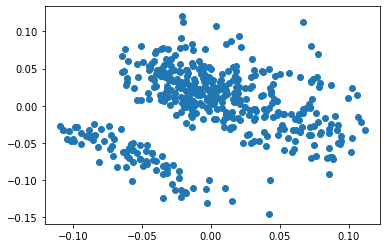

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(Xknn.T)
plt.scatter(pca.components_[0], pca.components_[1])

In [170]:
df_log

SlFM0001  SlFM0002  SlFM0003  SlFM0004  SlFM0006  SlFM0007  SlFM0008  \
0    4.435721  3.876460  3.995966  4.718631  5.265218  5.671736  5.075230   
1    3.806912  3.907669  4.066363  4.144127  5.350574  5.576161  4.736152   
2    3.633903  3.934117  3.199714  3.508664  5.271392  5.429679  4.468461   
3    4.395236  3.962076  3.738102  4.374549  5.664545  5.629063  5.228638   
4    3.992100  3.934610  4.015381  3.814011  5.273630  5.364499  4.827131   
..        ...       ...       ...       ...       ...       ...       ...   
437  5.872258  4.399961  5.905110  6.603856  5.154665  5.875676  6.345995   
438  5.855673  4.486409  5.778378  6.512496  5.198638  5.752443  6.351461   
439  5.916584  4.488355  5.723370  6.654636  5.255805  5.733158  6.472058   
440  5.762167  4.486736  5.548268  6.523497  5.210894  5.934568  6.274693   
441  5.829772  4.327848  5.374820  6.662980  5.318404  5.912995  6.244579   

     SlFM0009  SlFM0010  SlFM0011  ...  SlFM1991  SlFM1992  SlFM1993  \
0    4.136178  5.089699  4.753972  ...  5.355379  4.170297  4.197289   
1    3.793109  4.557874  4.536074  ...  4.402883  4.805254  3.584535   
2    3.616455  3.780477  3.790253  ...  5.403211  4.498818  4.247158   
3    3.717263  5.001167  4.955996  ...  5.025401  4.812005  4.098793   
4    3.875165  4.712522  4.771326  ...  4.348328  3.694294  3.768364   
..        ...       ...       ...  ...       ...       ...       ...   
437  5.613860  6.303497  6.321107  ...  7.246459  5.882695  5.489545   
438  5.505678  5.819518  6.302442  ...  5.520328  5.092522  5.065327   
439  5.724857  5.856406  6.380281  ...  5.544001  5.409944  4.325007   
440  5.466630  5.676275  6.208534  ...  4.701092  4.818367  3.925910   
441  5.488673  6.347020  6.129242  ...  4.866346  4.472944  4.107403   

     SlFM1994  SlFM1995  SlFM1996  SlFM1997  SlFM1998  SlFM1999  SlFM2000  
0    4.906401  3.000000  4.683882  4.317957  3.539785  4.931980  5.782499  
1    4.145577  3.000000  4.555311  4.298970  3.505326  4.981782  5.743321  
2    4.452115  3.000000  4.799358  4.585751  3.504743  4.950051  5.810700  
3    4.393610  3.000000  4.752723  4.433138  3.629751  5.016432  5.788197  
4    4.237087  3.000000  4.219499  4.072878  3.425420  4.631298  5.450331  
..        ...       ...       ...       ...       ...       ...       ...  
437  4.078709  3.000000  4.556778  3.905002  3.541978  4.676302  6.031214  
438  5.590878  3.000000  3.926314  5.738259  4.340653  6.027315  6.781001  
439  5.324066  3.000000  3.888979  5.649621  4.004781  5.717487  6.505710  
440  5.135258  2.770962  5.000022  5.182774  4.005005  5.473013  6.286860  
441  4.220130  3.000000  4.805765  4.814538  3.329865  5.052908  5.889053  

[442 rows x 980 columns]

In [2]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.set_xlim(-40, 40)
ax.set_ylim(-20, 15)

ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
colors = ['orange', 'darkgreen', 'mediumblue']
for group, color in zip(groups,colors):
    indicesToKeep = df_final['Group'] == group
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(groups)
ax.grid()

SlFM0001    SlFM0002     SlFM0003      SlFM0004     SlFM0006  \
0     27272.2500   7524.2000    9907.5500  5.231555e+04  184169.6502   
1      6410.8000   8084.8000   11651.0000  1.393565e+04  224168.1084   
2      4304.3000   8592.4500    1583.8500  3.226000e+03  186806.5001   
3     24844.8500   9163.8000    5471.4500  2.368910e+04  461896.9999   
4      9819.7500   8602.2000   10360.5000  6.516450e+03  187771.8005   
..           ...         ...          ...           ...          ...   
437  745174.9492  25116.6000  803730.1018  4.016576e+06  142779.1497   
438  717253.6504  30648.5001  600313.9509  3.254585e+06  157993.0499   
439  825247.2498  30786.1001  528896.0994  4.514770e+06  180220.7997   
440  578318.8495  30671.5501  353400.8000  3.338081e+06  162515.3505   
441  675727.9993  21273.9500  237039.2005  4.602350e+06  208163.2000   

        SlFM0007      SlFM0008     SlFM0009      SlFM0010      SlFM0011  ...  \
0    469608.0716  1.189131e+05   13682.9000  1.229415e+05  5.675085e+04  ...   
1    376843.8492  5.446932e+04    6210.2500  3.613051e+04  3.436164e+04  ...   
2    268954.7998  2.940771e+04    4134.8000  6.032216e+03  6.169537e+03  ...   
3    425660.4489  1.692925e+05    5215.1000  1.002690e+05  9.036405e+04  ...   
4    231472.4006  6.716310e+04    7501.8000  5.158485e+04  5.906445e+04  ...   
..           ...           ...          ...           ...           ...  ...   
437  751062.7022  2.218169e+06  411016.8488  2.011394e+06  2.094630e+06  ...   
438  565512.9006  2.246267e+06  320389.1509  6.599612e+05  2.006513e+06  ...   
439  540951.3512  2.965225e+06  530710.1995  7.184648e+05  2.400385e+06  ...   
440  860137.2023  1.882317e+06  292839.7008  4.745421e+05  1.616344e+06  ...   
441  818455.1977  1.756219e+06  308086.5511  2.223415e+06  1.346612e+06  ...   

         SlFM1991     SlFM1992     SlFM1993     SlFM1994  SlFM1995  \
0    2.266619e+05   14801.2000   15750.3000   80612.2997   1000.00   
1    2.528615e+04   63863.6500    3841.8000   13982.2500   1000.00   
2    2.530525e+05   31536.8000   17666.8000   28321.3999   1000.00   
3    1.060233e+05   64864.1500   12554.3000   24752.0000   1000.00   
4    2.230120e+04    4946.4500    5866.3000   17261.8500   1000.00   
..            ...          ...          ...          ...       ...   
437  1.763838e+07  763300.3990  308705.7009   11986.9500   1000.00   
438  3.313811e+05  123743.3002  116232.2998  389832.3902   1000.00   
439  3.499457e+05  257006.4498   21135.2500  210894.6498   1000.00   
440  5.024485e+04   65821.3999    8431.5960  136539.5002    590.15   
441  7.350990e+04   29712.7999   12805.7000   16600.8500   1000.00   

        SlFM1996     SlFM1997  SlFM1998      SlFM1999      SlFM2000  
0     48292.7999   20794.9000   3465.65  8.550275e+04  6.060375e+05  
1     35917.8999   19905.3500   3201.30  9.589200e+04  5.537594e+05  
2     63002.5499   38525.7499   3197.00  8.913555e+04  6.466950e+05  
3     56587.8498   27110.5000   4263.35  1.038560e+05  6.140405e+05  
4     16576.7500   11827.1000   2663.30  4.278565e+04  2.820534e+05  
..           ...          ...       ...           ...           ...  
437   36039.3999    8035.3000   3483.20  4.745720e+04  1.074518e+06  
438    8439.4500  547342.3492  21910.55  1.064914e+06  6.039507e+06  
439    7744.2500  446293.5992  10110.70  5.217791e+05  3.204131e+06  
440  100005.0002  152325.9497  10115.90  2.971758e+05  1.935799e+06  
441   63938.8998   65243.6001   2137.30  1.129555e+05  7.745563e+05  

[442 rows x 980 columns]

In [230]:
metab_list = df_final.columns[4:]                # Set peaklist to the metabolite names in the peakTableClean
X = df_rep1.iloc[:, 4:].values                      # Extract X matrix from dataTable using peaklist
Xlog = np.log10(X)                                  # Log scale (base-10)
Xscale = cb.utils.scale(Xlog, method='level')        # methods include auto, pareto, vast, and level
Xknn = cb.utils.knnimpute(Xscale, k=3)              # missing value imputation (knn - 3 nearest neighbors)

print("Xknn: {} rows & {} columns".format(*Xknn.shape))

cb.plot.pca(Xknn,
            pcx=1,                                                  # pc for x-axis
            pcy=2,                                                  # pc for y-axis
            group_label=df_final['Group'])                    # labels for Hover in PCA loadings plot

Xknn: 442 rows & 978 columns


Loading BokehJS ...

In [728]:
df_logavg['Group'] = df_variants['Group'][:442]

1.0917121181616916
1.21383650437376
1.2115125949866052


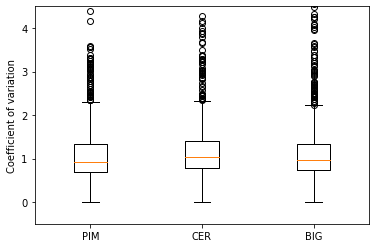

In [736]:
#Coefficient of variation for each metabolite across each group:

data = []
groups = ['PIM', 'CER', 'BIG']
for x in groups:
    mean = np.mean(df_final1[df_final1['Group'] == x])
    stdev = np.std(df_final1[df_final1['Group'] == x])
    data.append(stdev/mean)
plt.figure(figsize = (6, 4))
plt.boxplot(data)
plt.xticks([1, 2, 3], groups)
plt.ylim(-0.5, 4.5)
plt.ylabel('Coefficient of variation')
for x in data:
    print(np.mean(x))

NameError: name 'df_rep1' is not defined

In [254]:
#log transform the data
new = df.iloc[:, 2:].fillna(5)
logged = np.log2(new)
#logged = logged.replace(np.log2(5), np.nan)

In [265]:
df

Accessions  Replicate    SlFM0001    SlFM0002    SlFM0003    SlFM0004  \
0         TS-1          1  27272.2500   7524.2000   9907.5500  52315.5500   
1         TS-2          1   6410.8000   8084.8000  11651.0000  13935.6500   
2         TS-3          1   4304.3000   8592.4500   1583.8500   3226.0000   
3         TS-4          1  24844.8500   9163.8000   5471.4500  23689.1000   
4         TS-5          1   9819.7500   8602.2000  10360.5000   6516.4500   
..         ...        ...         ...         ...         ...         ...   
879     TS-700          2   1024.1339  15674.8370   6543.4744    713.4160   
880     TS-701          2   1416.6685   6980.8179   2810.4091    537.1689   
881     TS-702          2    438.0220   3787.6969   2214.4227   1923.8061   
882     TS-731          2         NaN  15128.7994         NaN    673.8754   
883     TS-739          2   2061.0690   6328.4684   2230.9995    277.2414   

        SlFM0006     SlFM0007     SlFM0008    SlFM0009  ...      SlFM1991  \
0    184169.6502  469608.0716  118913.1213  13682.9000  ...  2.266619e+05   
1    224168.1084  376843.8492   54469.3201   6210.2500  ...  2.528615e+04   
2    186806.5001  268954.7998   29407.7134   4134.8000  ...  2.530525e+05   
3    461896.9999  425660.4489  169292.5499   5215.1000  ...  1.060233e+05   
4    187771.8005  231472.4006   67163.1000   7501.8000  ...  2.230120e+04   
..           ...          ...          ...         ...  ...           ...   
879   25263.0431  232780.1655  165998.1203  32565.1276  ...  1.620856e+07   
880   31818.4051  133001.0565   71476.1923  10509.2662  ...  1.559524e+05   
881   19143.4676  173469.9317  235927.9554  24402.5192  ...  2.665473e+05   
882   18180.2009  203976.3198  188506.9148  20064.3304  ...  2.800164e+04   
883   18806.0415  197917.3413  272818.0684  28283.8548  ...  4.976020e+04   

        SlFM1992     SlFM1993     SlFM1994  SlFM1995     SlFM1996  \
0     14801.2000   15750.3000   80612.2997       NaN   48292.7999   
1     63863.6500    3841.8000   13982.2500       NaN   35917.8999   
2     31536.8000   17666.8000   28321.3999       NaN   63002.5499   
3     64864.1500   12554.3000   24752.0000       NaN   56587.8498   
4      4946.4500    5866.3000   17261.8500       NaN   16576.7500   
..           ...          ...          ...       ...          ...   
879  927503.5962  292365.2906    3478.3260       NaN   60267.8250   
880   69637.5613  105033.1384  112663.5656  702.6445  800452.6841   
881  325115.0441   30883.6064   79619.9337       NaN  709818.6868   
882   49673.8518   11542.2988   31712.1682       NaN  196670.0640   
883   21924.0027    9918.8819    5244.0558       NaN  115725.9764   

        SlFM1997   SlFM1998     SlFM1999      SlFM2000  
0     20794.9000  3465.6500   85502.7499  6.060375e+05  
1     19905.3500  3201.3000   95892.0000  5.537594e+05  
2     38525.7499  3197.0000   89135.5502  6.466950e+05  
3     27110.5000  4263.3500  103855.9999  6.140405e+05  
4     11827.1000  2663.3000   42785.6501  2.820534e+05  
..           ...        ...          ...           ...  
879    7698.0752  2447.5941   56833.4006  6.828172e+05  
880  200847.3457  9465.2746  650659.5221  1.000871e+06  
881  181926.3852  5936.2610  522218.5972  1.341707e+06  
882   51841.5966  5889.3047  231417.7052  1.081862e+06  
883   28660.0769   705.8536   56438.5237  3.279704e+05  

[884 rows x 982 columns]

In [266]:
#knn imputation of missing values

import numpy as np
from sklearn.impute import KNNImputer

X = df.iloc[:, 2:]
imputer = KNNImputer(n_neighbors=2)
Xknn = imputer.fit_transform(X)

In [271]:
#average the data
df_final[metab_list] = Xknn
df_rep1 = df_final[df_final['Replicate'] == 1]
df_rep2 = df_final[df_final['Replicate'] == 2]

means = (df_rep1.iloc[:, 4:].values + df_rep2.iloc[:, 4:].values)/2
df_meanlog = pd.DataFrame(data = means, columns = metab_list)
df_meanlog['Group'] = df_variants['Group'].iloc[:442]
df_meanlog['Accession'] = df_variants['Individual code'].iloc[:442]
df_meanlog

SlFM0001     SlFM0002      SlFM0003    SlFM0004      SlFM0006  \
0    16841.52500   7804.50000  10779.275000  33125.6000  204168.87930   
1    14574.57500   8878.12500   3527.650000  13457.5500  324351.75000   
2     8135.42500   8542.10000   6168.650000   5191.5500  191632.47515   
3    18810.94995   7919.35000   6928.350000  12516.5000  254203.87500   
4     5116.17500  12249.82500   1713.675000   2558.9250  244011.44980   
..           ...          ...           ...         ...           ...   
437   1947.71275  18485.97225   6719.339200   2175.5984   42943.26895   
438   1053.62885  19688.76820  10608.317750   4088.4208   47560.28480   
439   1397.30800  16665.38270   4179.648450   1285.4882   23894.17130   
440    927.34525   5384.25740   2512.415900   1230.4875   25480.93635   
441   1589.53200  10728.63390   2876.118525    475.5584   18493.12120   

         SlFM0007      SlFM0008     SlFM0009      SlFM0010      SlFM0011  ...  \
0    423225.96040   86691.22070   9946.57500   79536.00530   45556.24650  ...   
1    347307.62435   99350.13165   4674.95000   53150.60770   48266.79355  ...   
2    341685.87590   91588.59995  12979.60000   81749.37505   83107.87500  ...   
3    296623.32435   42329.75755  12880.95005   23154.16965   74897.07510  ...   
4    369649.92565  109043.01840   6275.47500   75149.37950   44479.06785  ...   
..            ...           ...          ...           ...           ...  ...   
437  263254.85585  363693.46130  54016.84830  347549.65880  339436.65955  ...   
438  196190.68015  154948.03825  13579.39810  199670.68925  121551.70875  ...   
439  206615.72140  136815.56625  22941.41660  126970.62785  142974.87415  ...   
440  153235.49410  153702.07385  17455.89270   46354.22010  139963.83230  ...   
441  200946.83055  230662.49160  24174.09260  237219.55370  184734.16970  ...   

         SlFM1993     SlFM1994    SlFM1995      SlFM1996      SlFM1997  \
0      9796.05000  47297.27485  691.793950   42105.34990   20350.12500   
1     15110.55000  26536.69995  587.321800   59795.19985   32818.12495   
2      5744.10000  62252.92500  483.325175   35346.37510   27751.07495   
3     25208.19995  39086.97510  867.849325  131727.02480   85581.09990   
4      7612.85000  53723.95000  680.991825   36030.75005   34437.12510   
..            ...          ...         ...           ...           ...   
437   26994.36200   9492.98385  358.773725  233945.93405   50039.48390   
438  699176.54750   9456.95305  356.053650  150552.97575   35597.00140   
439  153959.05180  20503.03780  453.292075  183452.27720   42319.11840   
440   67958.37240  96141.74965  615.833350  755135.68545  191386.86545   
441   10730.59035  18478.11200  537.134575  156198.02020   40250.83675   

       SlFM1998      SlFM1999      SlFM2000  Group  Accession  
0    3333.47500   90697.37495  5.798985e+05    BIG       TS-1  
1    3730.17500   96495.77505  6.303678e+05    BIG       TS-2  
2    3329.65000  121047.72485  7.213125e+05    BIG       TS-3  
3    4391.07500  188209.72515  1.257045e+06    BIG       TS-4  
4    4267.97500  131663.89985  7.699290e+05    BIG       TS-5  
..          ...           ...           ...    ...        ...  
437  3098.71310  115047.98840  6.536067e+05    BIG     TS-574  
438  1902.10305  101606.19130  3.299423e+05    BIG     TS-575  
439  2449.59630  131030.75285  9.578346e+05    BIG     TS-576  
440  7700.76780  586439.05965  1.171289e+06    BIG     TS-577  
441  3297.57915  143928.11445  7.049162e+05    BIG     TS-578  

[442 rows x 982 columns]

In [137]:
from sklearn.preprocessing import StandardScaler

Xknn_norm = StandardScaler().fit_transform(Xknn) # normalizing the features
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(Xknn_norm)
principaldf = pd.DataFrame(data = projected
             , columns = ['PC1', 'PC2'])

In [138]:
principaldf

PC1        PC2
0    -5.541603  11.589776
1    -1.502123  15.339379
2    -7.291653  11.643711
3    -4.171847  15.536555
4    -0.482863  17.269960
..         ...        ...
879  23.087202  -1.420505
880  18.116083   1.180104
881  17.110019  -1.242483
882  26.270817   2.004389
883  30.015600   2.927454

[884 rows x 2 columns]

Individual code Group
0              TS-1   BIG
1              TS-2   BIG
2              TS-3   BIG
3              TS-4   BIG
4              TS-5   BIG
..              ...   ...
606          TS-743   BIG
607          TS-744  WILD
608          TS-745  WILD
609          TS-746  WILD
610             NaN   NaN

[611 rows x 2 columns]

In [493]:
PIM_04 = df_final[df_final['Group'] == 'PIM'].iloc[:, 7]
df_final

Individual code Group Accessions  Replicate     SlFM0001    SlFM0002  \
0              TS-1   BIG       TS-1          1   27272.2500   7524.2000   
1              TS-1   BIG       TS-1          2          NaN  13786.5620   
2              TS-2   BIG       TS-2          1    6410.8000   8084.8000   
3              TS-2   BIG       TS-2          2     368.2094  14028.2874   
4              TS-3   BIG       TS-3          1    4304.3000   8592.4500   
..              ...   ...        ...        ...          ...         ...   
879          TS-702   CER     TS-702          2     438.0220   3787.6969   
880          TS-731   CER     TS-731          1  578318.8495  30671.5501   
881          TS-731   CER     TS-731          2          NaN  15128.7994   
882          TS-739   BIG     TS-739          1  675727.9993  21273.9500   
883          TS-739   BIG     TS-739          2    2061.0690   6328.4684   

        SlFM0003      SlFM0004     SlFM0006     SlFM0007  ...     SlFM1991  \
0      9907.5500  5.231555e+04  184169.6502  469608.0716  ...  226661.8999   
1      4234.2838  6.737013e+02   81219.1203  249759.6387  ...  231594.6338   
2     11651.0000  1.393565e+04  224168.1084  376843.8492  ...   25286.1500   
3      2009.4234           NaN   70862.7209  266296.0438  ...   30713.4347   
4      1583.8500  3.226000e+03  186806.5001  268954.7998  ...  253052.4506   
..           ...           ...          ...          ...  ...          ...   
879    2214.4227  1.923806e+03   19143.4676  173469.9317  ...  266547.3457   
880  353400.8000  3.338081e+06  162515.3505  860137.2023  ...   50244.8500   
881          NaN  6.738754e+02   18180.2009  203976.3198  ...   28001.6440   
882  237039.2005  4.602350e+06  208163.2000  818455.1977  ...   73509.9001   
883    2230.9995  2.772414e+02   18806.0415  197917.3413  ...   49760.2013   

        SlFM1992    SlFM1993     SlFM1994  SlFM1995     SlFM1996     SlFM1997  \
0     14801.2000  15750.3000   80612.2997       NaN   48292.7999   20794.9000   
1     18517.5275  21575.1929   44166.5971       NaN  160885.9894   43368.1229   
2     63863.6500   3841.8000   13982.2500       NaN   35917.8999   19905.3500   
3     71646.7047   6682.3222   11091.5381  362.8149   95260.8717   21830.9342   
4     31536.8000  17666.8000   28321.3999       NaN   63002.5499   38525.7499   
..           ...         ...          ...       ...          ...          ...   
879  325115.0441  30883.6064   79619.9337       NaN  709818.6868  181926.3852   
880   65821.3999   8431.5960  136539.5002  590.1500  100005.0002  152325.9497   
881   49673.8518  11542.2988   31712.1682       NaN  196670.0640   51841.5966   
882   29712.7999  12805.7000   16600.8500       NaN   63938.8998   65243.6001   
883   21924.0027   9918.8819    5244.0558       NaN  115725.9764   28660.0769   

       SlFM1998     SlFM1999      SlFM2000  
0     3465.6500   85502.7499  6.060375e+05  
1     2789.7453  127115.2663  8.340753e+05  
2     3201.3000   95892.0000  5.537594e+05  
3     1737.7853  129105.4422  6.269176e+05  
4     3197.0000   89135.5502  6.466950e+05  
..          ...          ...           ...  
879   5936.2610  522218.5972  1.341707e+06  
880  10115.9000  297175.7502  1.935799e+06  
881   5889.3047  231417.7052  1.081862e+06  
882   2137.3000  112955.5498  7.745563e+05  
883    705.8536   56438.5237  3.279704e+05  

[884 rows x 984 columns]

In [516]:
PIM_group = df_final[df_final['Group'] == 'PIM'][['Replicate', 'SlFM0042']]
group1 = PIM_group[PIM_group['Replicate'] == 1]
group2 = PIM_group[PIM_group['Replicate'] == 2]
print(np.log2(group1['SlFM0042']).mean())
print(np.log2(group2['SlFM0042']).mean())
print(np.mean((np.log2(group1['SlFM0042']) + np.log2(group1['SlFM0042']))/2))


12.484246090561891
15.082988236483555
12.484246090561891


In [519]:
rep1_values = df_rep1.iloc[:, 2:]
rep2_values = df_rep2.iloc[:, 2:]

In [664]:
log1 = np.log2(rep1_values).values
df_log1 = pd.DataFrame(data = log1, columns = metab_list)
log2 = np.log2(rep2_values).values

logavg = (log1 + log2)/2

In [679]:
df_logavg_dropna = df_logavg.combine_first(df_log1).dropna(axis = 1)

In [683]:
df_logavg = pd.DataFrame(data = logavg, columns = metab_list)

SlFM0002   SlFM0006   SlFM0007   SlFM0008   SlFM0010   SlFM0011  \
0    13.314149  16.900104  18.385639  16.679479  16.277078  16.000701   
1    13.378524  16.943480  18.273139  16.306970  16.004375  15.756013   
2    13.090739  16.300172  17.856434  16.057162  14.066162  14.951948   
3    13.854658  17.695188  18.496170  16.958858  16.758829  16.393211   
4    13.307085  16.063024  17.564607  15.713971  15.238533  15.367395   
..         ...        ...        ...        ...        ...        ...   
437  14.276258  15.874083  18.673591  19.210873  19.246740  19.198363   
438  13.836355  16.113538  18.065139  18.612136  17.015435  18.382352   
439  13.398548  15.841985  18.224733  19.673849  17.733611  19.476670   
440  14.394812  15.730148  18.676125  19.184168  17.452342  18.939220   
441  13.502220  15.933132  18.618541  19.400810  19.858908  19.031203   

      SlFM0014   SlFM0015   SlFM0017   SlFM0018  ...   SlFM1952   SlFM1975  \
0    15.855855  17.826452  13.707249  13.737191  ...  17.178999  19.254679   
1    14.974975  17.615754  12.867511  14.292945  ...  15.935058  19.631469   
2    16.022020  18.805606  13.883212  15.585858  ...  17.883387  19.722298   
3    15.594416  18.627272  14.011817  15.860204  ...  18.153033  18.668663   
4    16.544255  18.110966  12.928758  15.732315  ...  18.163173  19.066658   
..         ...        ...        ...        ...  ...        ...        ...   
437  16.905044  18.760026  16.890742  16.032304  ...  18.825104  21.480124   
438  17.803225  17.525754  18.753081  17.612432  ...  19.440469  21.494285   
439  16.970041  18.304057  17.960587  17.484930  ...  16.557170  20.062328   
440  16.449976  19.457440  15.243650  16.977745  ...  18.221794  13.160067   
441  16.542154  19.205069  16.154335  16.244913  ...  17.553649  19.489351   

      SlFM1983   SlFM1984   SlFM1985   SlFM1987   SlFM1989   SlFM1991  \
0    14.581482  13.990104  19.802100  14.564181  16.573719  17.805712   
1    15.076345  14.803099  19.159802  11.362671  18.162524  14.766321   
2    14.015659  13.783447  18.908238  14.190966  17.053333  17.715602   
3    15.070436  14.496339  18.971892  13.211650  18.229306  16.624909   
4    13.248611  12.740601  17.782399  10.605930  15.261099  14.168256   
..         ...        ...        ...        ...        ...        ...   
437  17.896210  17.006386  22.660618  21.437034  21.793633  24.011234   
438  15.023365  14.826495  19.707999  14.502616  18.933885  17.794439   
439  16.273122  16.214906  20.282522  14.838849  20.232450  18.220402   
440  15.763194  15.231870  19.969515  11.793422  18.342597  15.194956   
441  13.782885  13.294525  17.912909  12.485242  17.096677  15.884178   

      SlFM1992   SlFM2000  
0    14.015015  19.439433  
1    16.045660  19.168408  
2    14.777564  19.228979  
3    16.217652  19.274571  
4    12.741373  18.277767  
..         ...        ...  
437  19.682442  19.708199  
438  16.502284  21.229412  
439  18.141018  20.983570  
440  15.803234  20.464791  
441  14.639510  18.943108  

[442 rows x 701 columns]

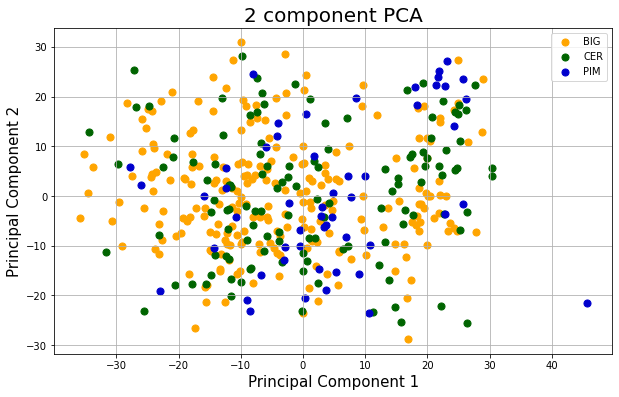

In [680]:
X = df_logavg_dropna

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf['Group'] = df_variants['Group'].iloc[:442]

#plotting
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


#ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
groups = ['BIG', 'CER', 'PIM']
colors = ['orange', 'darkgreen', 'mediumblue']
for group, color in zip(groups,colors):
    indicesToKeep = principalDf['Group'] == group
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(groups)
ax.grid()

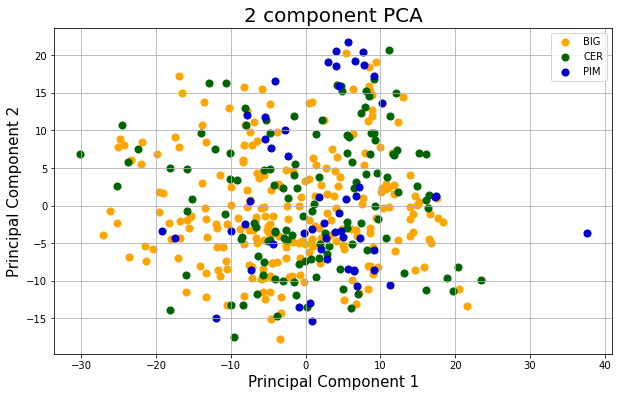

In [747]:
#trying with scaling
from sklearn.preprocessing import StandardScaler
x = X

# Standardizing the features
x = StandardScaler().fit_transform(x)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf['Group'] = df_variants['Group'].iloc[:442]

#plotting
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


#ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
groups = ['BIG', 'CER', 'PIM']
colors = ['orange', 'darkgreen', 'mediumblue']
for group, color in zip(groups,colors):
    indicesToKeep = principalDf['Group'] == group
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(groups)
ax.grid()

In [685]:
imputer = KNNImputer(n_neighbors=2)
Xknn = imputer.fit_transform(df_logavg)
Xknn.shape
X = Xknn

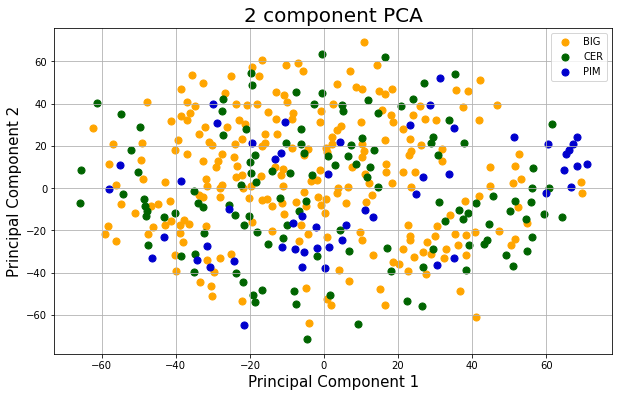

In [686]:
# MDS imports
from sklearn.manifold import MDS
# finding principle components
mds = MDS(n_components=2)
# MDS vizualization
X_mds = mds.fit_transform(X)
df_mds = pd.DataFrame(data = X_mds
             , columns = ['principal component 1', 'principal component 2'])
df_mds['Group'] = df_variants['Group'].iloc[:442]

#plotting
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


#ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
groups = ['BIG', 'CER', 'PIM']
colors = ['orange', 'darkgreen', 'mediumblue']
for group, color in zip(groups,colors):
    indicesToKeep = principalDf['Group'] == group
    ax.scatter(df_mds.loc[indicesToKeep, 'principal component 1']
               , df_mds.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(groups)
ax.grid()

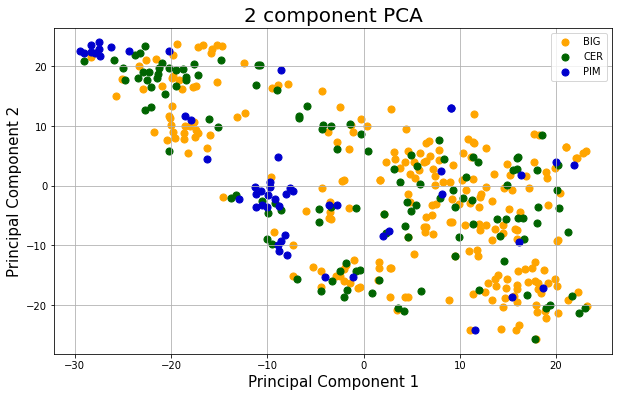

In [687]:
from sklearn.manifold import TSNE
# finding principle components
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

df_tsne = pd.DataFrame(data = X_tsne
             , columns = ['principal component 1', 'principal component 2'])
df_tsne['Group'] = df_variants['Group'].iloc[:442]

#plotting
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


#ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
groups = ['BIG', 'CER', 'PIM']
colors = ['orange', 'darkgreen', 'mediumblue']
for group, color in zip(groups,colors):
    indicesToKeep = principalDf['Group'] == group
    ax.scatter(df_tsne.loc[indicesToKeep, 'principal component 1']
               , df_tsne.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(groups)
ax.grid()

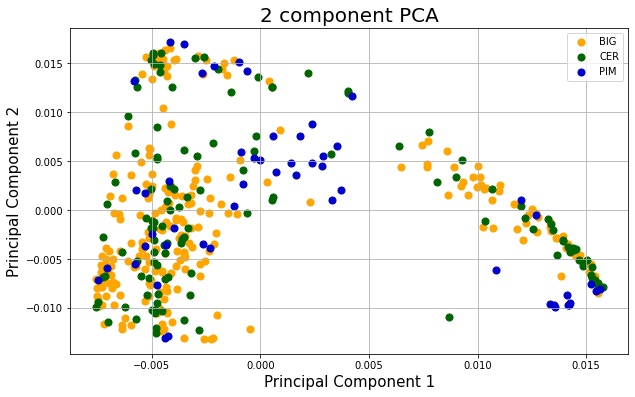

In [688]:
from sklearn.manifold import SpectralEmbedding as SE
# finding principle components
se = SE(n_components=2)
X_se = se.fit_transform(X)

df_se = pd.DataFrame(data = X_se
             , columns = ['principal component 1', 'principal component 2'])
df_se['Group'] = df_variants['Group'].iloc[:442]

#plotting
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


#ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
groups = ['BIG', 'CER', 'PIM']
colors = ['orange', 'darkgreen', 'mediumblue']
for group, color in zip(groups,colors):
    indicesToKeep = principalDf['Group'] == group
    ax.scatter(df_se.loc[indicesToKeep, 'principal component 1']
               , df_se.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(groups)
ax.grid()

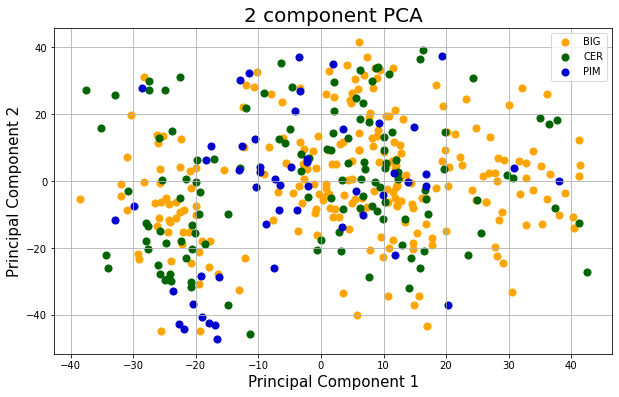

In [690]:
from sklearn.decomposition import SparsePCA
# finding principle components
spca = SparsePCA(n_components=2)
spca.fit(X);
X_se = spca.transform(X)
df_se = pd.DataFrame(data = X_se
             , columns = ['principal component 1', 'principal component 2'])
df_se['Group'] = df_variants['Group'].iloc[:442]

#plotting
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


#ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
groups = ['BIG', 'CER', 'PIM']
colors = ['orange', 'darkgreen', 'mediumblue']
for group, color in zip(groups,colors):
    indicesToKeep = principalDf['Group'] == group
    ax.scatter(df_se.loc[indicesToKeep, 'principal component 1']
               , df_se.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(groups)
ax.grid()

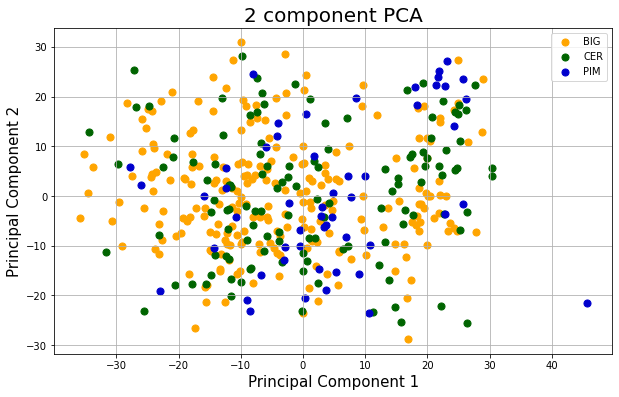

In [673]:
from sklearn.decomposition import KernelPCA
# finding principle components
spca = KernelPCA(n_components=2)
spca.fit(X);
X_se = spca.transform(X)
df_se = pd.DataFrame(data = X_se
             , columns = ['principal component 1', 'principal component 2'])
df_se['Group'] = df_variants['Group'].iloc[:442]

#plotting
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


#ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
groups = ['BIG', 'CER', 'PIM']
colors = ['orange', 'darkgreen', 'mediumblue']
for group, color in zip(groups,colors):
    indicesToKeep = principalDf['Group'] == group
    ax.scatter(df_se.loc[indicesToKeep, 'principal component 1']
               , df_se.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(groups)
ax.grid()

In [712]:
sigmetab = pd.read_csv('significant_metabolites.csv')
sigmetab = sigmetab['Chemical'].dropna() 
mask = np.isin(df_logavg_dropna.columns, sigmetab)
significant_metabolites = df_logavg_dropna.columns[mask]

In [713]:
df_logavg_dropna[significant_metabolites].shape

(442, 531)

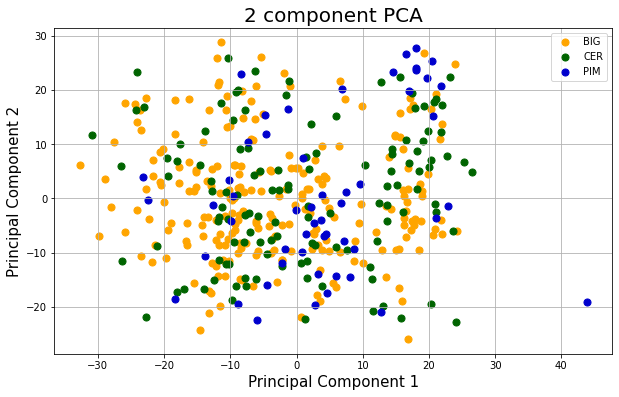

In [714]:
X = df_logavg_dropna[significant_metabolites]

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf['Group'] = df_variants['Group'].iloc[:442]

#plotting
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


#ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
groups = ['BIG', 'CER', 'PIM']
colors = ['orange', 'darkgreen', 'mediumblue']
for group, color in zip(groups,colors):
    indicesToKeep = principalDf['Group'] == group
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(groups)
ax.grid()

In [776]:
cl = scipy.cluster.hierarchy.linkage(df_logavg_dropna, metric='correlation', method='average', optimal_ordering=True)
print(cl.shape)

(441, 4)


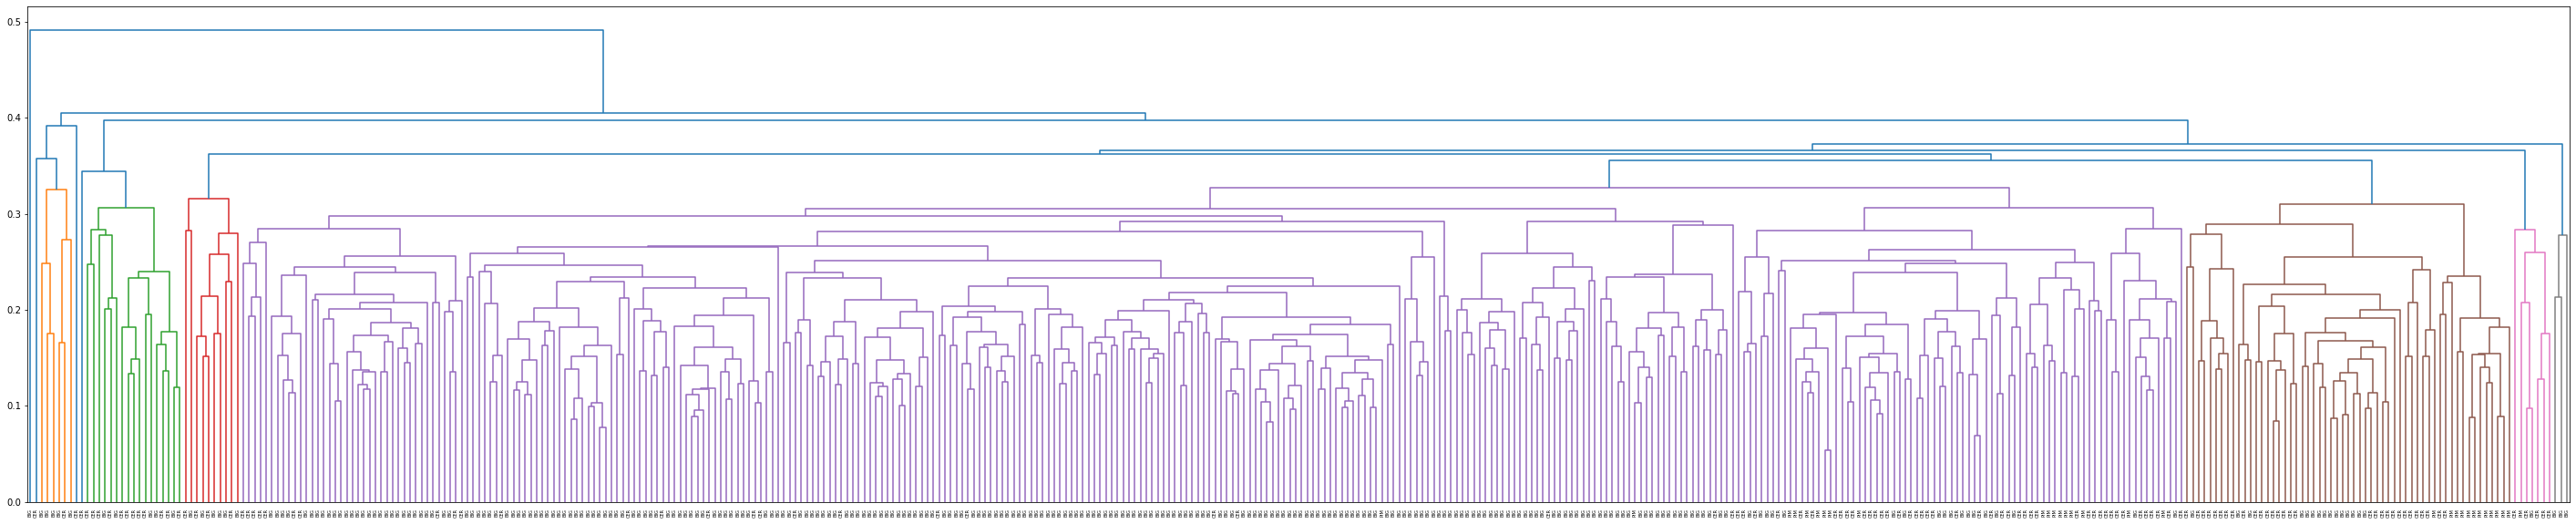

In [790]:
plt.figure(figsize=(50,10))
result = scipy.cluster.hierarchy.dendrogram(cl, truncate_mode='none', labels = labels)
# result = scipy.cluster.hierarchy.dendrogram(cl, no_plot=True)
# the above line can be used if no plot is necessary
plt.savefig('dend.png')

In [786]:
labels = list(df_final1['Group'])

In [838]:
df_rep1[sig_metabolites[:388]].fillna(1).shape

(442, 388)

In [936]:
X = np.log2(df_rep1[sig_metabolites[:388]].fillna(1).values)
pca = PCA(n_components = 2)
prinC = pca.fit_transform(X)


In [937]:
PC = pd.DataFrame(data = prinC, columns = ['PC1', 'PC2'])
PC['Group'] = df_final1['Group']

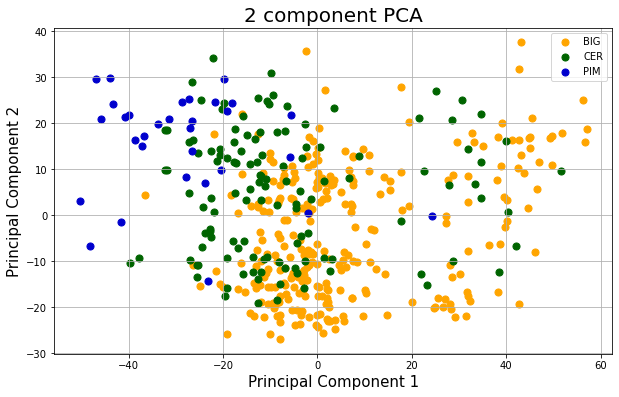

In [938]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


#ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
groups = ['BIG', 'CER', 'PIM']
colors = ['orange', 'darkgreen', 'mediumblue']
for group, color in zip(groups,colors):
    indicesToKeep = PC['Group'] == group
    ax.scatter(PC.loc[indicesToKeep, 'PC1']
               , PC.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(groups)
ax.grid()

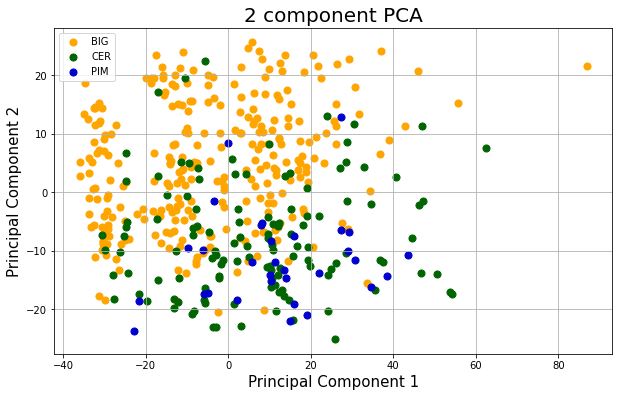

In [896]:
X = np.log2(df_rep1[sig_metabolites[388:]].fillna(0.001).values)
#X = StandardScaler().fit_transform(X)

pca = PCA(n_components = 2)
prinC = pca.fit_transform(X)
PC = pd.DataFrame(data = prinC, columns = ['PC1', 'PC2'])
PC['Group'] = df_final1['Group']
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


#ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
groups = ['BIG', 'CER', 'PIM']
colors = ['orange', 'darkgreen', 'mediumblue']
for group, color in zip(groups,colors):
    indicesToKeep = PC['Group'] == group
    ax.scatter(PC.loc[indicesToKeep, 'PC1']
               , PC.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(groups)
ax.grid()

In [882]:
df_logavg.iloc[:, :980]

SlFM0001   SlFM0002   SlFM0003   SlFM0004   SlFM0006   SlFM0007  \
0          NaN  13.314149  12.661107  12.535459  16.900104  18.385639   
1    10.585336  13.378524  12.240366        NaN  16.943480  18.273139   
2    10.839157  13.090739  11.744733  10.358199  16.300172  17.856434   
3          NaN  13.854658  11.884859        NaN  17.695188  18.496170   
4    11.784269  13.307085  12.248777  10.901830  16.063024  17.564607   
..         ...        ...        ...        ...        ...        ...   
437  14.753704  14.276258  16.146096  15.708067  15.874083  18.673591   
438  14.960205  13.836355  15.325961  15.351637  16.113538  18.065139   
439  14.214663  13.398548  15.062670  16.507984  15.841985  18.224733   
440        NaN  14.394812        NaN  15.533463  15.730148  18.676125   
441  15.187630  13.502220  14.489120  15.124469  15.933132  18.618541   

      SlFM0008   SlFM0009   SlFM0010   SlFM0011  ...   SlFM1991   SlFM1992  \
0    16.679479  13.038499  16.277078  16.000701  ...  17.805712  14.015015   
1    16.306970  13.235893  16.004375  15.756013  ...  14.766321  16.045660   
2    16.057162  13.235237  14.066162  14.951948  ...  17.715602  14.777564   
3    16.958858  12.963932  16.758829  16.393211  ...  16.624909  16.217652   
4    15.713971  12.765516  15.238533  15.367395  ...  14.168256  12.741373   
..         ...        ...        ...        ...  ...        ...        ...   
437  19.210873  16.819939  19.246740  19.198363  ...  24.011234  19.682442   
438  18.612136  15.824420  17.015435  18.382352  ...  17.794439  16.502284   
439  19.673849  16.796154  17.733611  19.476670  ...  18.220402  18.141018   
440  19.184168  16.226049  17.452342  18.939220  ...  15.194956  15.803234   
441  19.400810  16.510334  19.858908  19.031203  ...  15.884178  14.639510   

      SlFM1993   SlFM1994  SlFM1995   SlFM1996   SlFM1997   SlFM1998  \
0    14.170089  15.864690       NaN  16.427600  14.874145  11.602414   
1    12.306850  13.604240       NaN  15.836006  14.347477  11.203738   
2    14.030989  14.656047       NaN  16.384118  14.923025        NaN   
3    13.717435  14.449331       NaN  16.381094  15.008888  11.652438   
4    12.176994  14.033023       NaN  14.994156  13.723361  11.414272   
..         ...        ...       ...        ...        ...        ...   
437  18.196643  12.656677       NaN  15.508194  12.941209  11.511673   
438  16.753568  17.677078       NaN  16.326695  18.338912  13.813883   
439  14.640959  16.983503       NaN  16.178000  18.120314  12.919467   
440  13.268116  16.005854       NaN  17.097565  16.439312  12.914109   
441  13.460230  13.187718       NaN  16.392380  15.400152  10.262399   

      SlFM1999   SlFM2000  
0    16.669730  19.439433  
1    16.763657  19.168408  
2    16.528468  19.228979  
3    16.890619  19.274571  
4    15.732242  18.277767  
..         ...        ...  
437  15.664395  19.708199  
438  19.666925  21.229412  
439  18.993687  20.983570  
440  18.000548  20.464791  
441  16.284894  18.943108  

[442 rows x 980 columns]

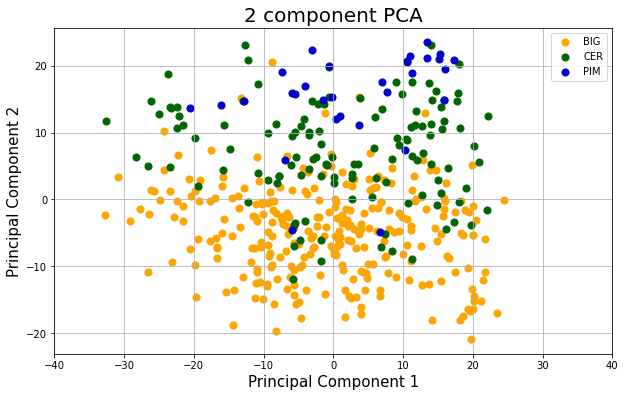

In [897]:
X = (df_logavg.iloc[:, :980].fillna(21).values)
X = StandardScaler().fit_transform(X)
pca = PCA(n_components = 2)
prinC = pca.fit_transform(X)
PC = pd.DataFrame(data = prinC, columns = ['PC1', 'PC2'])
PC['Group'] = df_final1['Group']
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.set_xlim(-40, 40)


#ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
groups = ['BIG', 'CER', 'PIM']
colors = ['orange', 'darkgreen', 'mediumblue']
for group, color in zip(groups,colors):
    indicesToKeep = PC['Group'] == group
    ax.scatter(PC.loc[indicesToKeep, 'PC1']
               , PC.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(groups)
ax.grid()

In [898]:
from sklearn.impute import KNNImputer

X = np.log2(df.iloc[:, 2:])
imputer = KNNImputer(n_neighbors=2)
Xknn = imputer.fit_transform(X)
df_imputed = pd.DataFrame(data = Xknn, columns = metab_list)
# df_imputed[metab_list].values = Xknn
df_imputed

SlFM0001   SlFM0002   SlFM0003   SlFM0004   SlFM0006   SlFM0007  \
0    14.735146  12.877322  13.274313  15.674952  17.490676  18.841098   
1    12.646289  12.980996  13.508166  13.766493  17.774222  18.523607   
2    12.071563  13.068854  10.629220  11.655531  17.511185  18.037004   
3    14.600659  13.161730  12.417707  14.531936  18.817212  18.699344   
4    13.261471  13.070490  13.338806  12.669871  17.518621  17.820481   
..         ...        ...        ...        ...        ...        ...   
879  10.000189  13.936163  12.675841   9.478600  14.624741  17.828609   
880  10.468286  12.769180  11.456564   9.069232  14.957574  17.021078   
881   8.774860  11.887105  11.112715  10.909748  14.224565  17.404326   
882  11.104315  13.885010  12.107643   9.396338  14.150081  17.638042   
883  11.009177  12.627641  11.123474   8.114999  14.198909  17.594538   

      SlFM0008   SlFM0009   SlFM0010   SlFM0011  ...   SlFM1991   SlFM1992  \
0    16.859548  13.740086  16.907612  15.792354  ...  17.790182  13.853427   
1    15.733156  12.600436  15.140930  15.068511  ...  14.626060  15.962707   
2    14.843907  12.013602  12.558472  12.590947  ...  17.949077  14.944749   
3    17.369159  12.348479  16.613516  16.463461  ...  16.694022  15.985134   
4    16.035381  12.873021  15.654660  15.850002  ...  14.444834  12.272178   
..         ...        ...        ...        ...  ...        ...        ...   
879  17.340807  14.991040  17.553716  17.398462  ...  23.950252  19.822993   
880  16.125175  13.359374  14.698847  15.828445  ...  17.250746  16.087578   
881  17.847987  14.574742  16.012664  17.758505  ...  18.024032  18.310591   
882  17.524258  14.292345  16.048507  17.254136  ...  14.773224  15.600199   
883  18.057580  14.787691  18.633471  17.701503  ...  15.602705  14.420224   

      SlFM1993   SlFM1994  SlFM1995   SlFM1996   SlFM1997   SlFM1998  \
0    13.943092  16.298712  9.062041  15.559520  14.343942  11.758910   
1    11.907567  13.771309  9.062041  15.132415  14.280869  11.644442   
2    14.108753  14.789605  9.594936  15.943123  15.233535  11.642503   
3    13.615894  14.595257  9.283763  15.788205  14.726564  12.057772   
4    12.518235  14.075299  9.062041  14.016874  13.529809  11.378999   
..         ...        ...       ...        ...        ...        ...   
879  18.157413  11.764177  8.966716  15.879100  12.910282  11.257149   
880  16.680485  16.781662  9.456651  19.610457  17.615740  13.208429   
881  14.914554  16.280842  8.983234  19.437091  17.472995  12.535339   
882  13.494643  14.952749  8.481937  17.585418  15.661823  12.523882   
883  13.275962  12.356467  8.485886  16.820353  14.806755   9.463225   

      SlFM1999   SlFM2000  
0    16.383683  19.209048  
1    16.549123  19.078900  
2    16.443713  19.302726  
3    16.664225  19.227974  
4    15.384839  18.105609  
..         ...        ...  
879  15.794451  19.381140  
880  19.311543  19.932825  
881  18.994294  20.355638  
882  17.820140  20.045085  
883  15.784393  18.323206  

[884 rows x 980 columns]

In [942]:
rep1 = df_imputed.iloc[:442][sig_metabolites[:388]]
rep2 = df_imputed.iloc[442:][sig_metabolites[:388]]

In [943]:
averaged = (rep1.values + rep2.values)/2


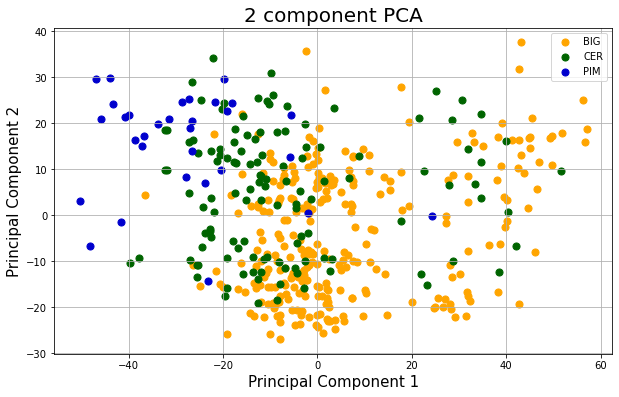

In [945]:
new = pca.fit_transform(averaged)
newdf = pd.DataFrame(data = new, columns = ['PC1', 'PC2'])
PC['Group'] = df_final1['Group']
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


#ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
groups = ['BIG', 'CER', 'PIM']
colors = ['orange', 'darkgreen', 'mediumblue']
for group, color in zip(groups,colors):
    indicesToKeep = PC['Group'] == group
    ax.scatter(PC.loc[indicesToKeep, 'PC1']
               , PC.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(groups)
ax.grid()

# Final Code

Text(0.5, 1.0, 'post-log-transformation, SlFM0007')

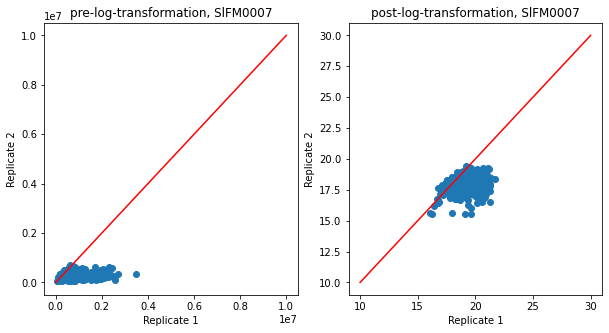

In [1277]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].plot([0, 10**7], [0, 10**7], c = 'r')
ax[0].scatter(df_rep1.iloc[:, 2:]['SlFM0007'], df_rep2.iloc[:, 2:]['SlFM0007'])
ax[0].set_xlabel('Replicate 1')
ax[0].set_ylabel('Replicate 2')
ax[0].set_title('pre-log-transformation, SlFM0007')

ax[1].plot([10, 30], [10, 30], c = 'r')
ax[1].scatter(np.log2(df_rep1.iloc[:, 2:]['SlFM0007']), np.log2(df_rep2.iloc[:, 2:]['SlFM0007']))
ax[1].set_xlabel('Replicate 1')
ax[1].set_ylabel('Replicate 2')
ax[1].set_title('post-log-transformation, SlFM0007')

In [ ]:
#data import

In [1114]:
df['Accession ID'] = df['Accessions'].str[3:].astype(int)
df

Accessions  Replicate    SlFM0001    SlFM0002    SlFM0003    SlFM0004  \
0         TS-1          1  27272.2500   7524.2000   9907.5500  52315.5500   
1         TS-2          1   6410.8000   8084.8000  11651.0000  13935.6500   
2         TS-3          1   4304.3000   8592.4500   1583.8500   3226.0000   
3         TS-4          1  24844.8500   9163.8000   5471.4500  23689.1000   
4         TS-5          1   9819.7500   8602.2000  10360.5000   6516.4500   
..         ...        ...         ...         ...         ...         ...   
879     TS-700          2   1024.1339  15674.8370   6543.4744    713.4160   
880     TS-701          2   1416.6685   6980.8179   2810.4091    537.1689   
881     TS-702          2    438.0220   3787.6969   2214.4227   1923.8061   
882     TS-731          2         NaN  15128.7994         NaN    673.8754   
883     TS-739          2   2061.0690   6328.4684   2230.9995    277.2414   

        SlFM0006     SlFM0007     SlFM0008    SlFM0009  ...     SlFM1992  \
0    184169.6502  469608.0716  118913.1213  13682.9000  ...   14801.2000   
1    224168.1084  376843.8492   54469.3201   6210.2500  ...   63863.6500   
2    186806.5001  268954.7998   29407.7134   4134.8000  ...   31536.8000   
3    461896.9999  425660.4489  169292.5499   5215.1000  ...   64864.1500   
4    187771.8005  231472.4006   67163.1000   7501.8000  ...    4946.4500   
..           ...          ...          ...         ...  ...          ...   
879   25263.0431  232780.1655  165998.1203  32565.1276  ...  927503.5962   
880   31818.4051  133001.0565   71476.1923  10509.2662  ...   69637.5613   
881   19143.4676  173469.9317  235927.9554  24402.5192  ...  325115.0441   
882   18180.2009  203976.3198  188506.9148  20064.3304  ...   49673.8518   
883   18806.0415  197917.3413  272818.0684  28283.8548  ...   21924.0027   

        SlFM1993     SlFM1994  SlFM1995     SlFM1996     SlFM1997   SlFM1998  \
0     15750.3000   80612.2997       NaN   48292.7999   20794.9000  3465.6500   
1      3841.8000   13982.2500       NaN   35917.8999   19905.3500  3201.3000   
2     17666.8000   28321.3999       NaN   63002.5499   38525.7499  3197.0000   
3     12554.3000   24752.0000       NaN   56587.8498   27110.5000  4263.3500   
4      5866.3000   17261.8500       NaN   16576.7500   11827.1000  2663.3000   
..           ...          ...       ...          ...          ...        ...   
879  292365.2906    3478.3260       NaN   60267.8250    7698.0752  2447.5941   
880  105033.1384  112663.5656  702.6445  800452.6841  200847.3457  9465.2746   
881   30883.6064   79619.9337       NaN  709818.6868  181926.3852  5936.2610   
882   11542.2988   31712.1682       NaN  196670.0640   51841.5966  5889.3047   
883    9918.8819    5244.0558       NaN  115725.9764   28660.0769   705.8536   

        SlFM1999      SlFM2000  Accession ID  
0     85502.7499  6.060375e+05             1  
1     95892.0000  5.537594e+05             2  
2     89135.5502  6.466950e+05             3  
3    103855.9999  6.140405e+05             4  
4     42785.6501  2.820534e+05             5  
..           ...           ...           ...  
879   56833.4006  6.828172e+05           700  
880  650659.5221  1.000871e+06           701  
881  522218.5972  1.341707e+06           702  
882  231417.7052  1.081862e+06           731  
883   56438.5237  3.279704e+05           739  

[884 rows x 983 columns]

Text(0.5, 1.0, 'post-log-transformation, SlFM1194')

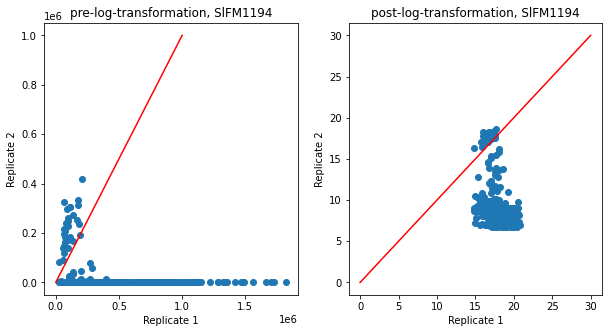

In [1278]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

ax[0].plot([0, 10**6], [0, 10**6], c = 'r')
ax[0].scatter(df_rep1.iloc[:, 2:]['SlFM1194'], df_rep2.iloc[:, 2:]['SlFM1194'])
ax[0].set_xlabel('Replicate 1')
ax[0].set_ylabel('Replicate 2')
ax[0].set_title('pre-log-transformation, SlFM1194')

ax[1].plot([0, 30], [0, 30], c = 'r')
ax[1].scatter(np.log2(df_rep1.iloc[:, 2:]['SlFM1194']), np.log2(df_rep2.iloc[:, 2:]['SlFM1194']))
ax[1].set_xlabel('Replicate 1')
ax[1].set_ylabel('Replicate 2')
ax[1].set_title('post-log-transformation, SlFM1194')

Text(0.5, 1.0, 'Data correlation between replicates')

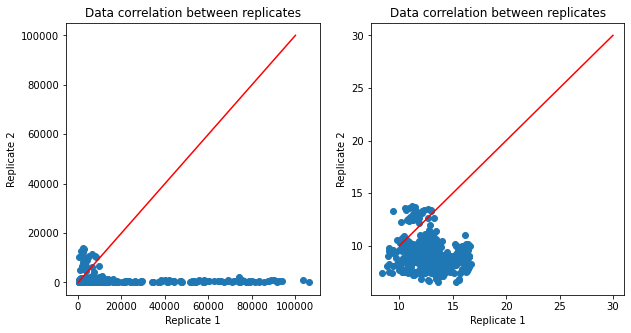

In [1010]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

ax[0].plot([0, 10**5], [0, 10**5], c = 'r')
ax[0].scatter(df_rep1.iloc[:, 2:]['SlFM0470'], df_rep2.iloc[:, 2:]['SlFM0470'])
ax[0].set_xlabel('Replicate 1')
ax[0].set_ylabel('Replicate 2')
ax[0].set_title('Data correlation between replicates')

ax[1].plot([10, 30], [10, 30], c = 'r')
ax[1].scatter(np.log2(df_rep1.iloc[:, 2:]['SlFM0470']), np.log2(df_rep2.iloc[:, 2:]['SlFM0470']))
ax[1].set_xlabel('Replicate 1')
ax[1].set_ylabel('Replicate 2')
ax[1].set_title('Data correlation between replicates')

## Missing Data

In [1141]:
rep1_logged = np.log2(df_rep1.iloc[:, 2:982])
rep2_logged = np.log2(df_rep2.iloc[:, 2:982])


-8.965784284662087

In [1152]:
print(rep1_logged.isnull().values.sum(), '/', rep1_logged.size, '{0:.2f}'.format(rep1_logged.isnull().values.sum()/rep1_logged.size*100))
print(rep2_logged.isnull().values.sum(), '/', rep2_logged.size, '{0:.2f}'.format(rep2_logged.isnull().values.sum()/rep2_logged.size*100))

5999 / 433160 1.38
10024 / 433160 2.31


Text(249.0, 0.5, 'Tomato Sample')

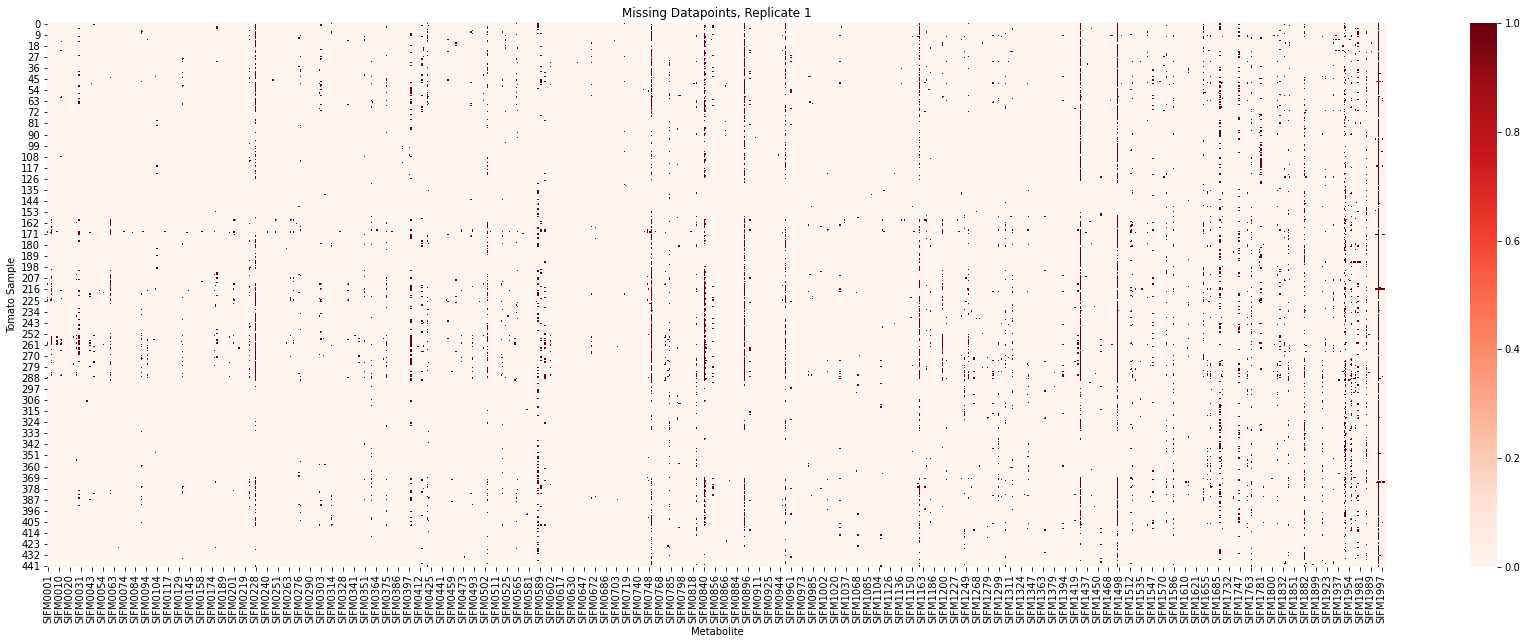

In [1024]:
plt.figure(figsize = (30, 10))
sns.heatmap(rep1_logged.isnull(), cmap = 'Reds')
plt.title('Missing Datapoints, Replicate 1')
plt.xlabel('Metabolite')
plt.ylabel('Tomato Sample')

Text(249.0, 0.5, 'Tomato Sample')

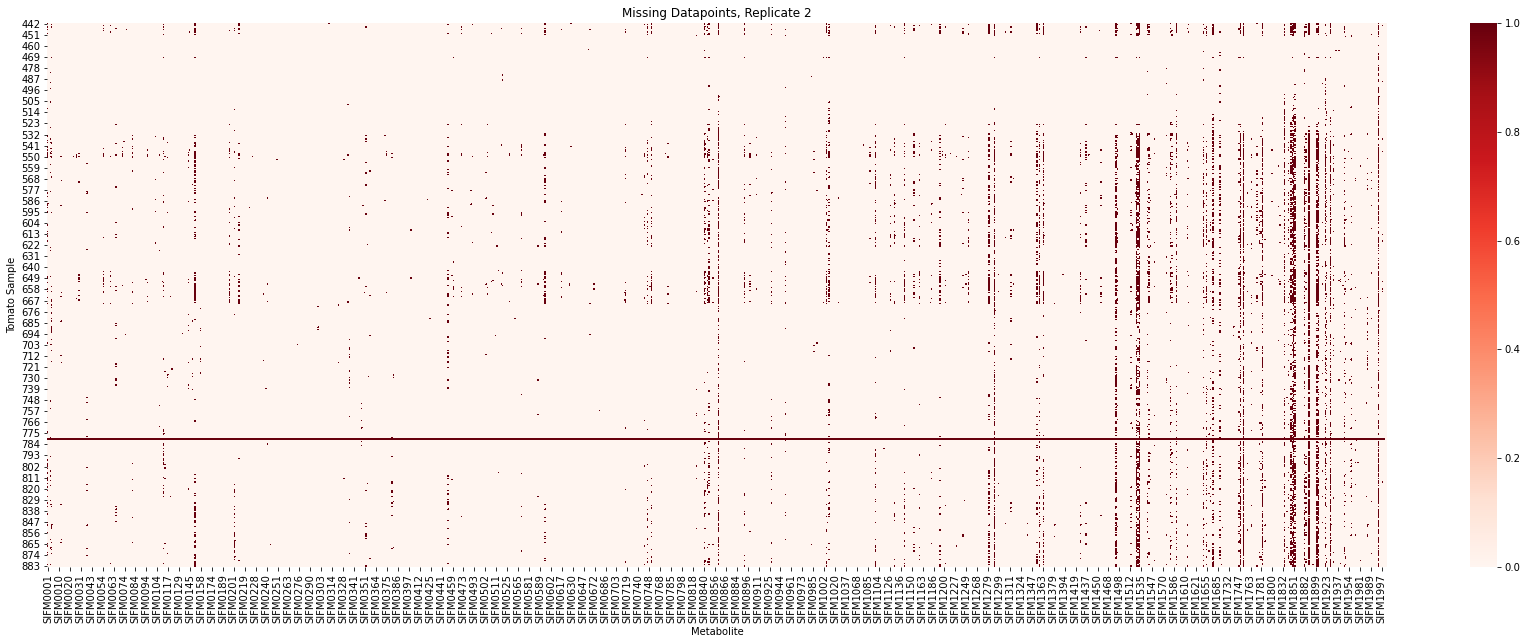

In [1026]:
plt.figure(figsize = (30, 10))
sns.heatmap(rep2_logged.isnull(), cmap = 'Reds')
plt.title('Missing Datapoints, Replicate 2')
plt.xlabel('Metabolite')
plt.ylabel('Tomato Sample')

In [1038]:
all_data = np.log2(df.iloc[:, 2:])
all_data['Accessions'] = df['Accessions']
all_data = all_data.merge(df_variants, left_on = 'Accessions', right_on = 'Individual code')

In [1039]:
BIG = all_data[all_data['Group'] == 'BIG']
CER = all_data[all_data['Group'] == 'CER']
PIM = all_data[all_data['Group'] == 'PIM']


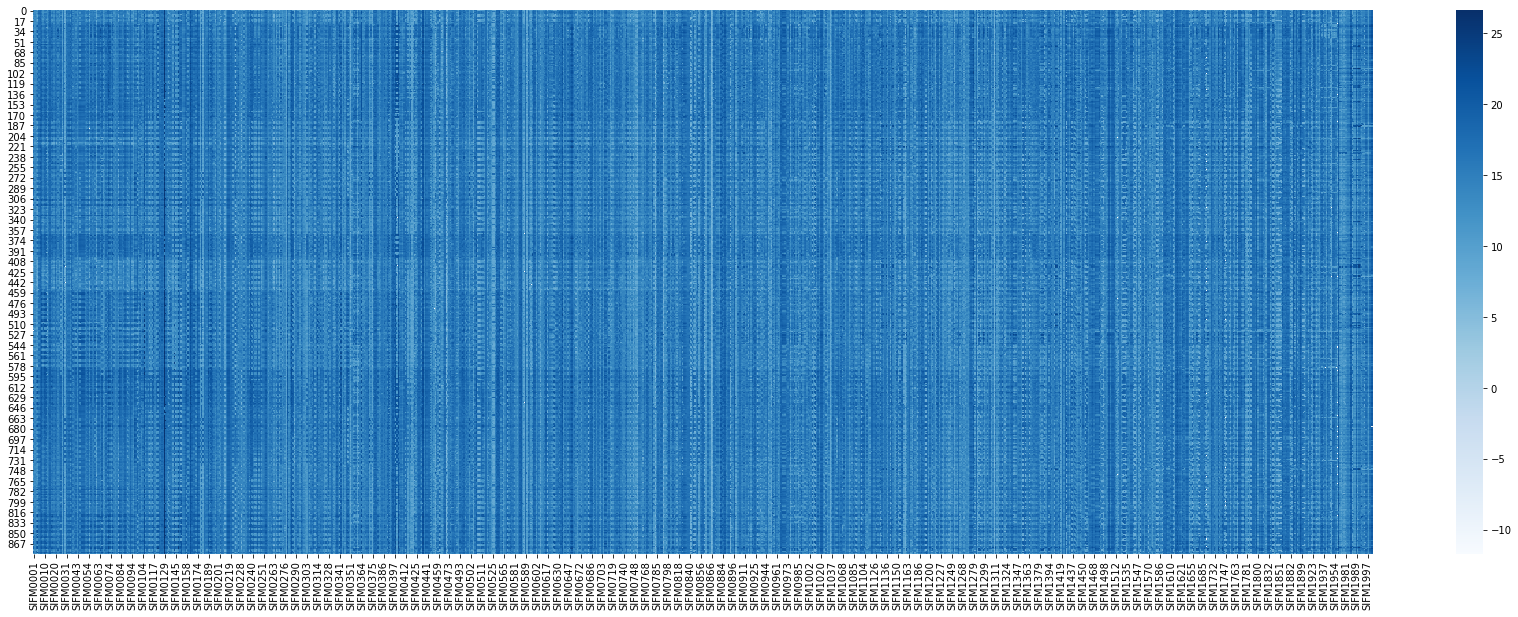

In [1081]:
plt.figure(figsize = (30, 10))

sns.heatmap(all_data.iloc[:, :980], cmap = 'Blues')

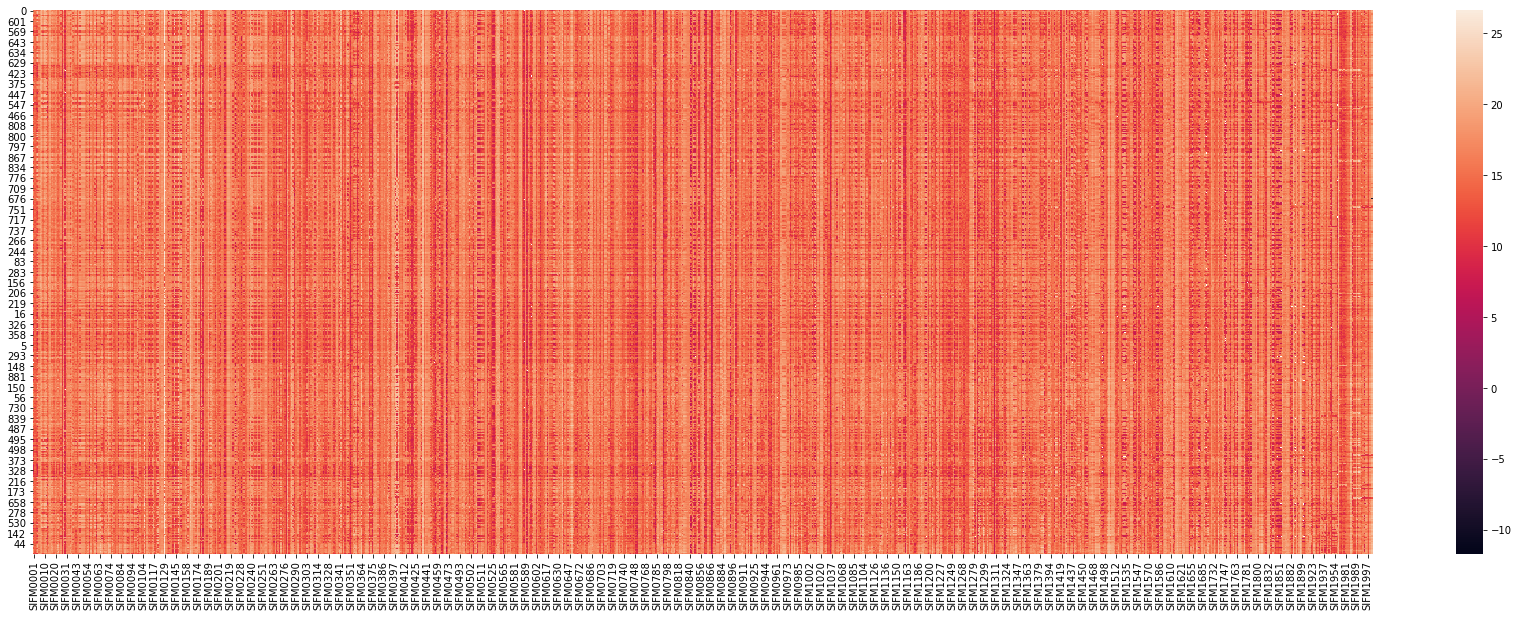

In [1092]:
plt.figure(figsize = (30, 10))



In [1172]:
groups = all_data['Group'].iloc[:442]

Text(249.0, 0.5, 'Tomato Sample')

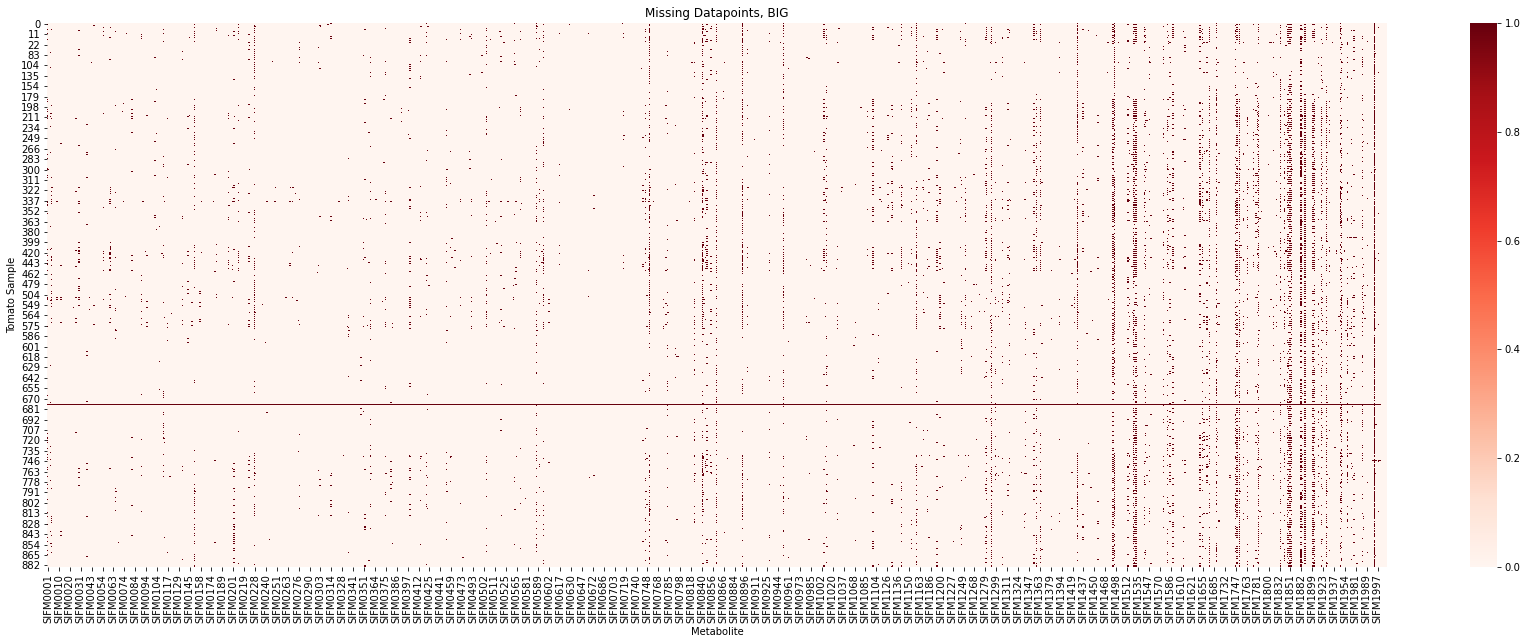

In [1041]:
plt.figure(figsize = (30, 10))
sns.heatmap(BIG.isnull(), cmap = 'Reds')
plt.title('Missing Datapoints, BIG')
plt.xlabel('Metabolite')
plt.ylabel('Tomato Sample')

Text(249.0, 0.5, 'Tomato Sample')

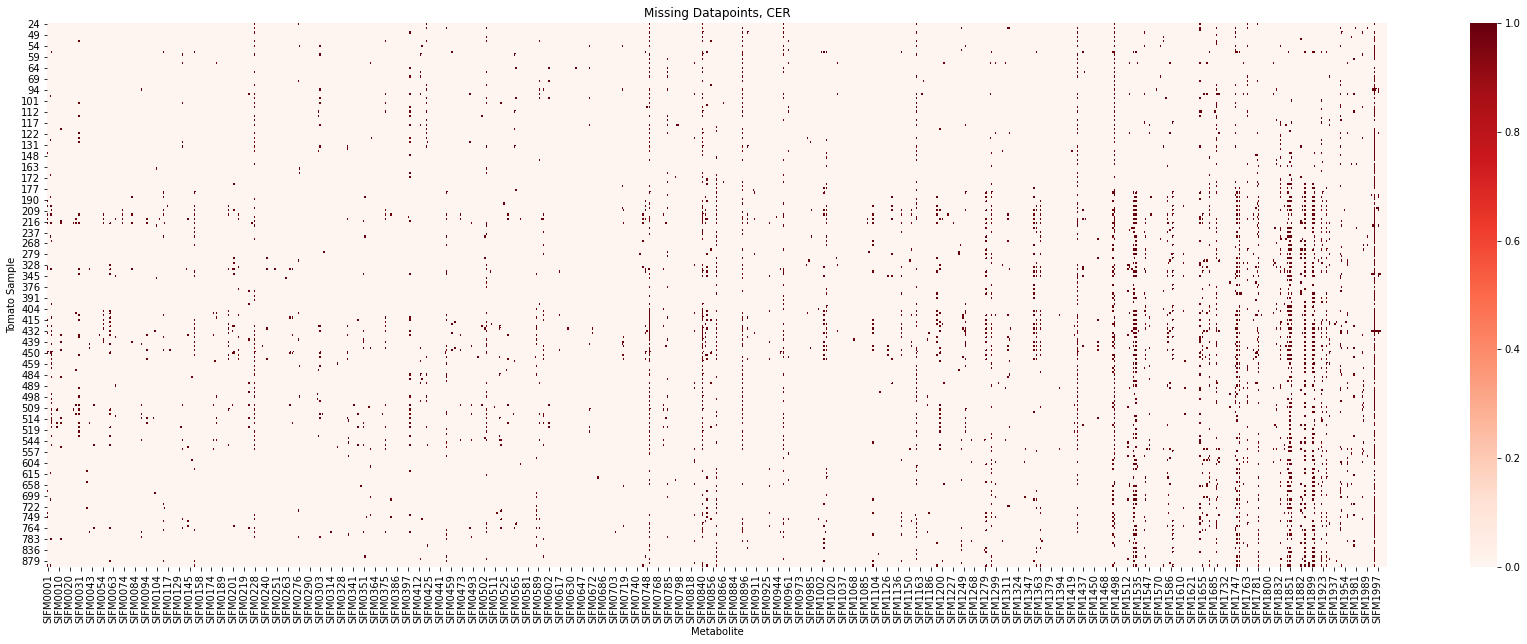

In [1043]:
plt.figure(figsize = (30, 10))
sns.heatmap(CER.isnull(), cmap = 'Reds')
plt.title('Missing Datapoints, CER')
plt.xlabel('Metabolite')
plt.ylabel('Tomato Sample')

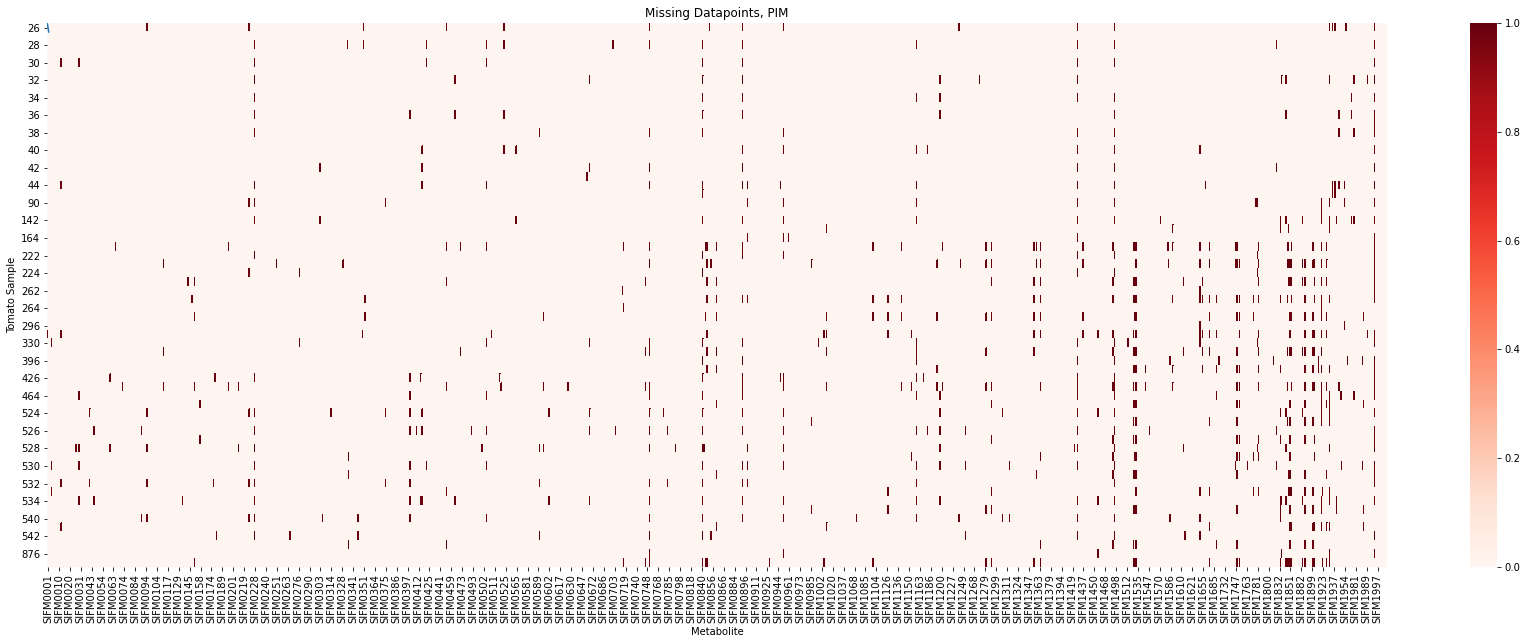

In [1045]:
plt.figure(figsize = (30, 10))
sns.heatmap(PIM.isnull(), cmap = 'Reds')
plt.title('Missing Datapoints, PIM')
plt.xlabel('Metabolite')
plt.ylabel('Tomato Sample')
plt.plot([0, 1], [0, 1])

In [1264]:
groups = all_data['Group'].iloc[:442]
rep1_logged['Group'] = list(groups)
rep2_logged['Group'] = list(groups)

In [1258]:
PIM2 = rep2_logged[rep2_logged['Group'] == 'PIM']
CER2 = rep2_logged[rep2_logged['Group'] == 'CER']
CER1 = rep1_logged[rep1_logged['Group'] == 'CER']
BIG2 = rep2_logged[rep2_logged['Group'] == 'BIG']

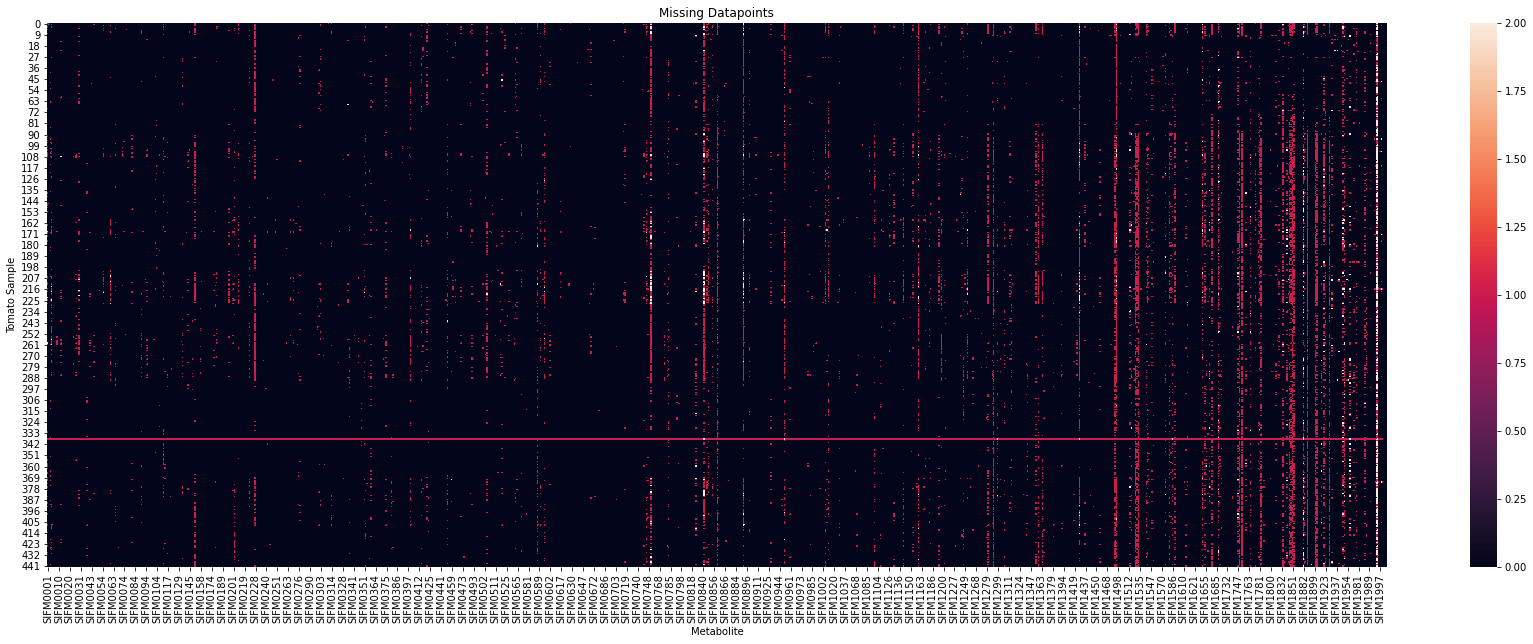

In [1283]:
plt.figure(figsize = (30, 10))
sns.heatmap(rep1_logged.isnull().astype(int) + rep2_logged.isnull().astype(int))
plt.title('Missing Datapoints')
#2 = both missing, 1 = missing in one dataset, 0 = none missing
plt.xlabel('Metabolite')
plt.ylabel('Tomato Sample')
plt.plot([0, 1], [0, 1])

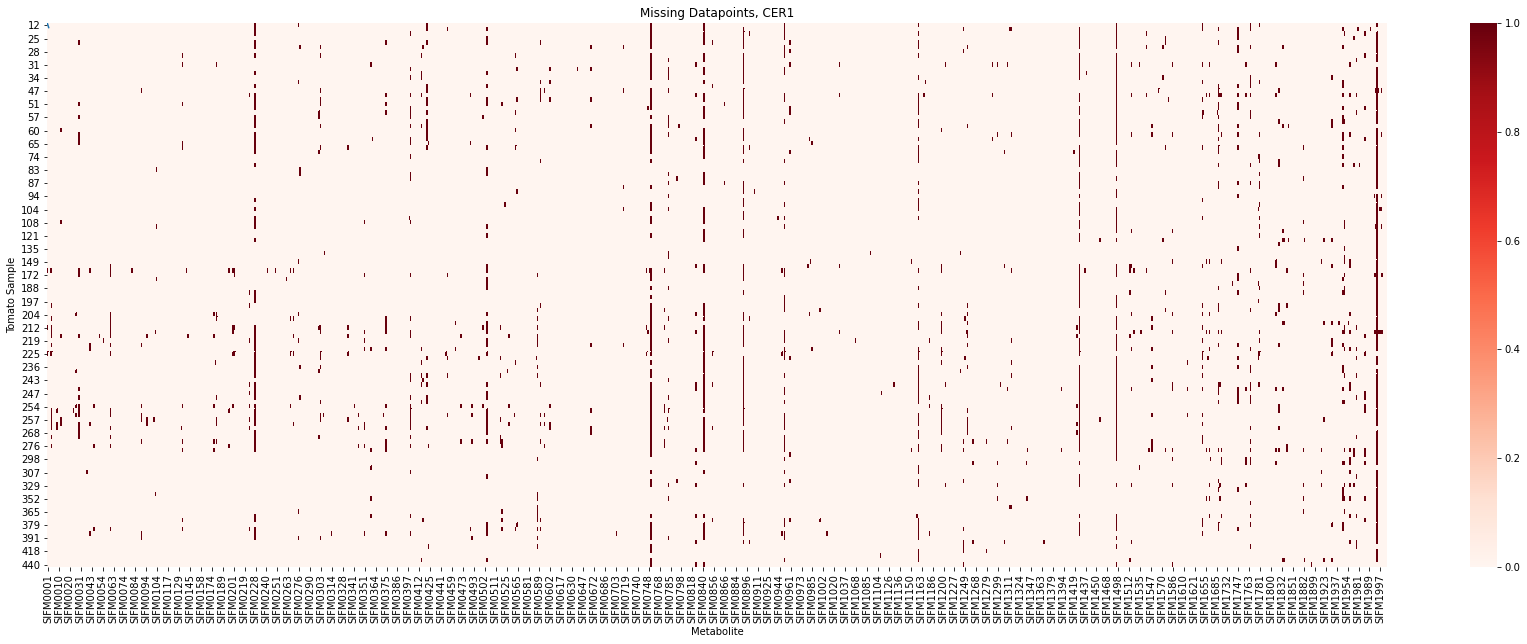

In [1273]:
plt.figure(figsize = (30, 10))
sns.heatmap(CER1.isnull(), cmap = 'Reds')
plt.title('Missing Datapoints, CER1')
plt.xlabel('Metabolite')
plt.ylabel('Tomato Sample')
plt.plot([0, 1], [0, 1])

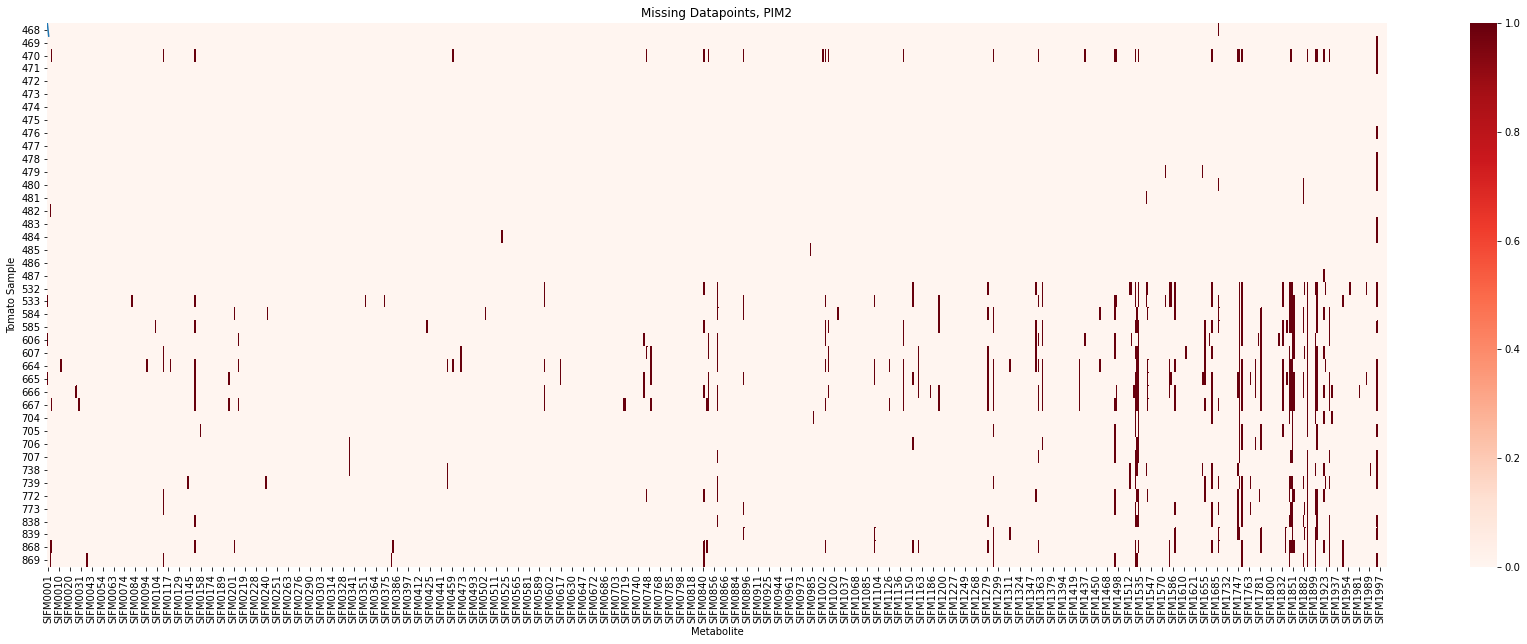

In [1069]:
plt.figure(figsize = (30, 10))
sns.heatmap(PIM2.isnull(), cmap = 'Reds')
plt.title('Missing Datapoints, PIM2')
plt.xlabel('Metabolite')
plt.ylabel('Tomato Sample')
plt.plot([0, 1], [0, 1])

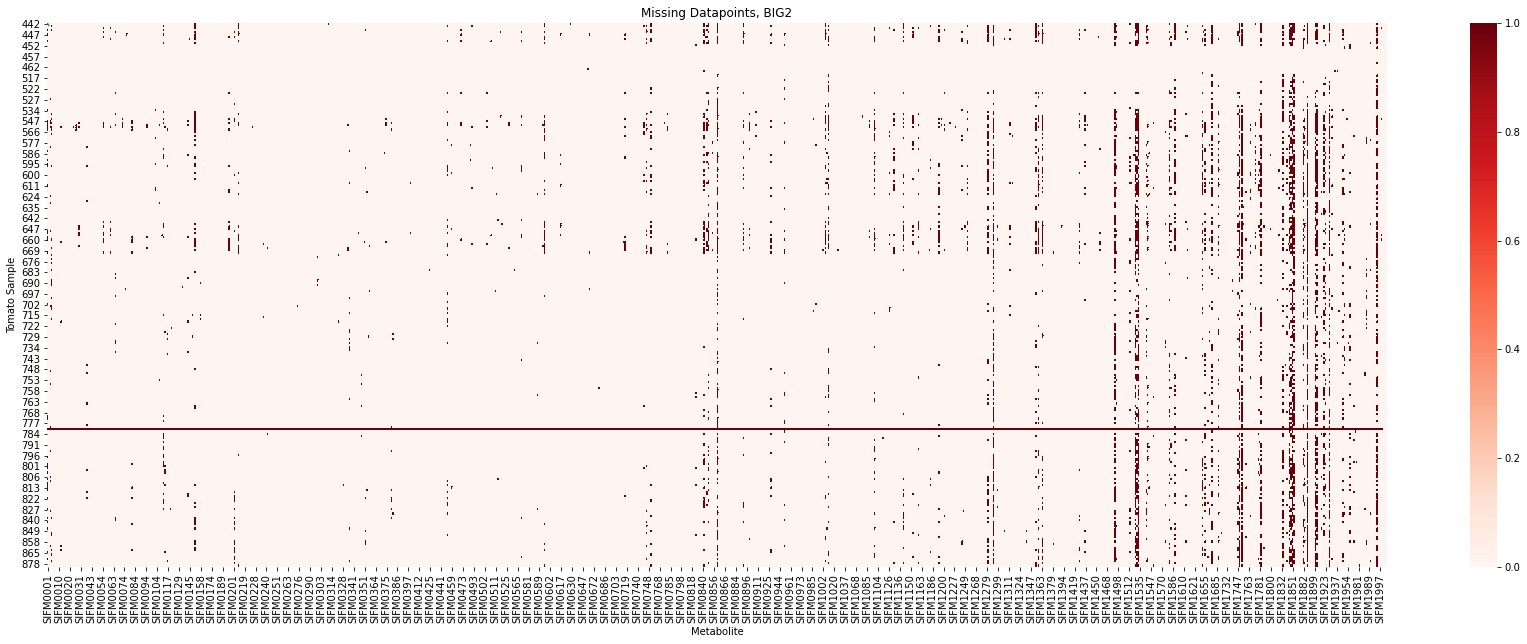

In [1073]:
plt.figure(figsize = (30, 10))
sns.heatmap(BIG2.isnull(), cmap = 'Reds')
plt.title('Missing Datapoints, BIG2')
plt.xlabel('Metabolite')
plt.ylabel('Tomato Sample')
plt.plot([0, 1], [0, 1])

In [1115]:
all_data = df.merge(df_variants, left_on = 'Accessions', right_on = 'Individual code').sort_values(by = ['Replicate','Accession ID'])



In [1183]:
#impute missing data
from sklearn.impute import KNNImputer
X = rep1_logged
imputer = KNNImputer(n_neighbors=2)
Xknn = imputer.fit_transform(X)
rep1_log_imputed = pd.DataFrame(data = Xknn, columns = metab_list)
# df_imputed[metab_list].values = Xknn
rep1_log_imputed

SlFM0001   SlFM0002   SlFM0003   SlFM0004   SlFM0006   SlFM0007  \
0    14.735146  12.877322  13.274313  15.674952  17.490676  18.841098   
1    12.646289  12.980996  13.508166  13.766493  17.774222  18.523607   
2    12.071563  13.068854  10.629220  11.655531  17.511185  18.037004   
3    14.600659  13.161730  12.417707  14.531936  18.817212  18.699344   
4    13.261471  13.070490  13.338806  12.669871  17.518621  17.820481   
..         ...        ...        ...        ...        ...        ...   
437  19.507220  14.616354  19.616352  21.937535  17.123426  19.518574   
438  19.452124  14.903529  19.195358  21.634042  17.269502  19.109200   
439  19.654467  14.909992  19.012625  22.106221  17.459406  19.045139   
440  19.141506  14.904613  18.430946  21.670588  17.310216  19.714207   
441  19.366083  14.376800  17.854766  22.133939  17.667356  19.642544   

      SlFM0008   SlFM0009   SlFM0010   SlFM0011  ...   SlFM1991   SlFM1992  \
0    16.859548  13.740086  16.907612  15.792354  ...  17.790182  13.853427   
1    15.733156  12.600436  15.140930  15.068511  ...  14.626060  15.962707   
2    14.843907  12.013602  12.558472  12.590947  ...  17.949077  14.944749   
3    17.369159  12.348479  16.613516  16.463461  ...  16.694022  15.985134   
4    16.035381  12.873021  15.654660  15.850002  ...  14.444834  12.272178   
..         ...        ...        ...        ...  ...        ...        ...   
437  21.080938  18.648838  20.939764  20.998264  ...  24.072215  19.541891   
438  21.099098  18.289466  19.332022  20.936259  ...  18.338132  16.916991   
439  21.499710  19.017565  19.454558  21.194835  ...  18.416772  17.971445   
440  20.844078  18.159752  18.856177  20.624303  ...  15.616688  16.006269   
441  20.744041  18.232976  21.084346  20.360903  ...  16.165651  14.858797   

      SlFM1993   SlFM1994   SlFM1995   SlFM1996   SlFM1997   SlFM1998  \
0    13.943092  16.298712   9.062041  15.559520  14.343942  11.758910   
1    11.907567  13.771309   9.062041  15.132415  14.280869  11.644442   
2    14.108753  14.789605   9.594936  15.943123  15.233535  11.642503   
3    13.615894  14.595257   9.283763  15.788205  14.726564  12.057772   
4    12.518235  14.075299   9.062041  14.016874  13.529809  11.378999   
..         ...        ...        ...        ...        ...        ...   
437  18.235873  13.549177   9.343017  15.137287  12.972136  11.766198   
438  16.826652  18.572494  10.143246  13.042933  19.062084  14.419338   
439  14.367364  17.686163   9.349628  12.918910  18.767634  13.303595   
440  13.041590  17.058959   9.204938  16.609713  17.216802  13.304337   
441  13.644498  14.018969   9.382336  15.964406  15.993549  11.061574   

      SlFM1999   SlFM2000  
0    16.383683  19.209048  
1    16.549123  19.078900  
2    16.443713  19.302726  
3    16.664225  19.227974  
4    15.384839  18.105609  
..         ...        ...  
437  15.534339  20.035258  
438  20.022306  22.525999  
439  18.993080  21.611502  
440  18.180957  20.884497  
441  16.785396  19.563011  

[442 rows x 980 columns]

In [1184]:
#impute missing data
from sklearn.impute import KNNImputer
X = rep2_logged
imputer = KNNImputer(n_neighbors=2)
Xknn = imputer.fit_transform(X)
rep2_log_imputed = pd.DataFrame(data = Xknn, columns = metab_list)
# df_imputed[metab_list].values = Xknn
rep2_log_imputed

SlFM0001   SlFM0002   SlFM0003   SlFM0004   SlFM0006   SlFM0007  \
0    10.058664  13.750975  12.047902   9.395965  16.309532  17.930181   
1     8.524383  13.776051  10.972566   9.531084  16.112739  18.022671   
2     9.606751  13.112625  12.860245   9.060867  15.089158  17.675865   
3     8.504534  14.547586  11.352010   8.435099  16.573163  18.292996   
4    10.307068  13.543681  11.158748   9.133789  14.607427  17.308733   
..         ...        ...        ...        ...        ...        ...   
437  10.000189  13.936163  12.675841   9.478600  14.624741  17.828609   
438  10.468286  12.769180  11.456564   9.069232  14.957574  17.021078   
439   8.774860  11.887105  11.112715  10.909748  14.224565  17.404326   
440  11.104315  13.885010  12.107643   9.396338  14.150081  17.638042   
441  11.009177  12.627641  11.123474   8.114999  14.198909  17.594538   

      SlFM0008   SlFM0009   SlFM0010   SlFM0011  ...   SlFM1991   SlFM1992  \
0    16.499409  12.336912  15.646543  16.209047  ...  17.821242  14.176604   
1    16.880783  13.871351  16.867821  16.443515  ...  14.906582  16.128613   
2    17.270417  14.456873  15.573851  17.312950  ...  17.482128  14.610380   
3    16.548557  13.579385  16.904141  16.322960  ...  16.555796  16.450170   
4    15.392560  12.658011  14.822407  14.884788  ...  13.891677  13.210568   
..         ...        ...        ...        ...  ...        ...        ...   
437  17.340807  14.991040  17.553716  17.398462  ...  23.950252  19.822993   
438  16.125175  13.359374  14.698847  15.828445  ...  17.250746  16.087578   
439  17.847987  14.574742  16.012664  17.758505  ...  18.024032  18.310591   
440  17.524258  14.292345  16.048507  17.254136  ...  14.773224  15.600199   
441  18.057580  14.787691  18.633471  17.701503  ...  15.602705  14.420224   

      SlFM1993   SlFM1994  SlFM1995   SlFM1996   SlFM1997   SlFM1998  \
0    14.397086  15.430668  8.968836  17.295679  15.404347  11.445918   
1    12.706134  13.437172  8.503090  16.539596  14.414086  10.763034   
2    13.953224  14.522489  9.001514  16.825113  14.612516   9.951440   
3    13.818976  14.303404  8.998081  16.973984  15.291213  11.247105   
4    11.835753  13.990747  8.483743  15.971438  13.916914  11.449546   
..         ...        ...       ...        ...        ...        ...   
437  18.157413  11.764177  8.966716  15.879100  12.910282  11.257149   
438  16.680485  16.781662  9.456651  19.610457  17.615740  13.208429   
439  14.914554  16.280842  8.983234  19.437091  17.472995  12.535339   
440  13.494643  14.952749  8.481937  17.585418  15.661823  12.523882   
441  13.275962  12.356467  8.485886  16.820353  14.806755   9.463225   

      SlFM1999   SlFM2000  
0    16.955778  19.669818  
1    16.978190  19.257916  
2    16.613222  19.155233  
3    17.117014  19.321167  
4    16.079645  18.449926  
..         ...        ...  
437  15.794451  19.381140  
438  19.311543  19.932825  
439  18.994294  20.355638  
440  17.820140  20.045085  
441  15.784393  18.323206  

[442 rows x 980 columns]

In [1218]:
#average the two replicates
avg_logged_data = (rep1_log_imputed + rep2_log_imputed) / 2

## PCA

In [1190]:
def plot_PCA(data):
    
    PC = pd.DataFrame(data = data, columns = ['PC1', 'PC2'])
    PC['Group'] = df_final1['Group']
    fig = plt.figure(figsize = (10,6))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)



    #ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
    groups = ['BIG', 'CER', 'PIM']
    colors = ['orange', 'darkgreen', 'mediumblue']
    for group, color in zip(groups,colors):
        indicesToKeep = PC['Group'] == group
        ax.scatter(PC.loc[indicesToKeep, 'PC1']
                   , PC.loc[indicesToKeep, 'PC2']
                   , c = color
                   , s = 50)
    ax.legend(groups)
    ax.grid()

Standard PCA

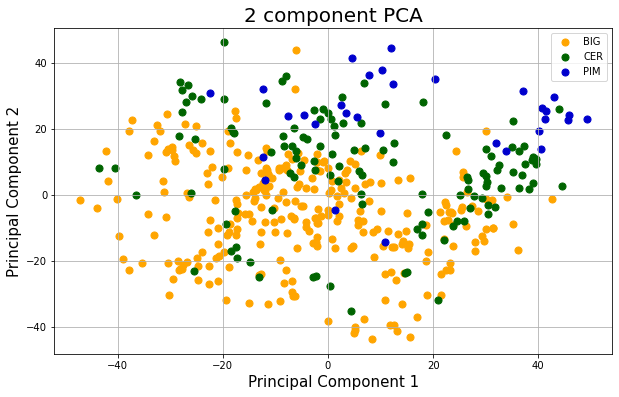

In [1191]:
X = avg_logged_data
pca = PCA(n_components = 2)
prinC = pca.fit_transform(X)

plot_PCA(prinC)

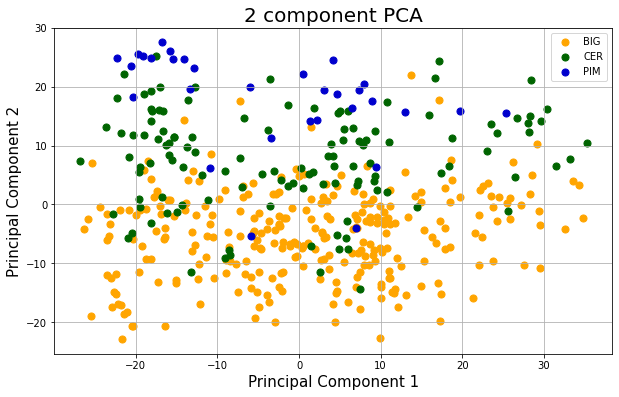

In [1192]:
#scaling data can help
X = StandardScaler().fit_transform(avg_logged_data)
prinC = pca.fit_transform(X)
plot_PCA(prinC)

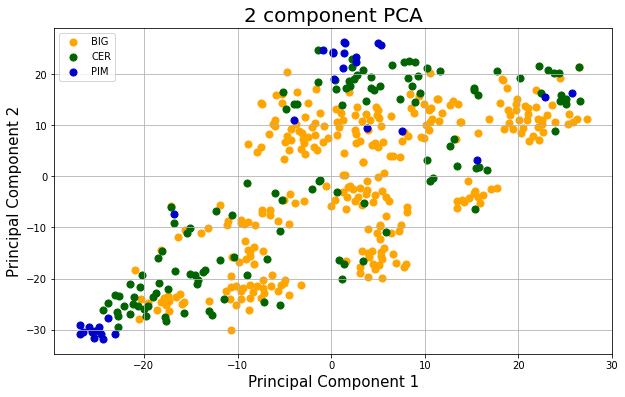

In [1193]:
from sklearn.manifold import TSNE
# finding principle components
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(avg_logged_data)
plot_PCA(X_tsne)

In [1219]:
#without kmeans filling in (pseudocount)
avg_logged_data_pc = (rep1_logged.fillna(0) + rep2_logged.fillna(0)) / 2

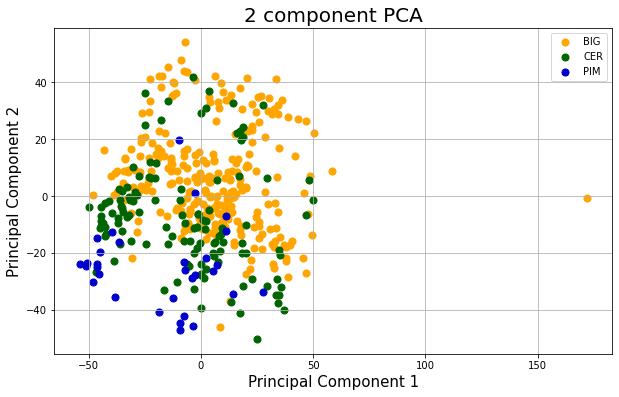

In [1220]:
X = avg_logged_data_pc
pca = PCA(n_components = 2)
prinC = pca.fit_transform(X)

plot_PCA(prinC)

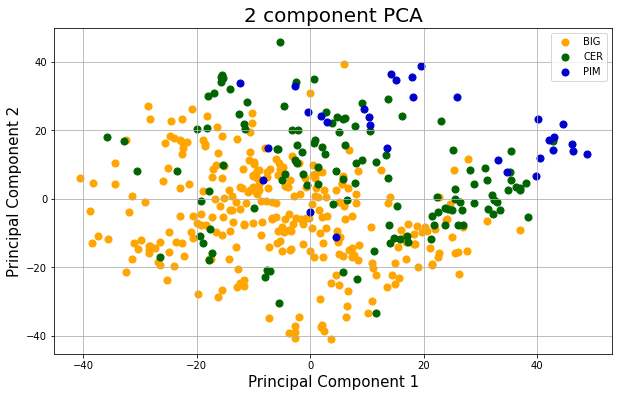

In [1221]:
#with significant metabolites filter
X = avg_logged_data[sig_metabolites]
pca = PCA(n_components = 2)
prinC = pca.fit_transform(X)

plot_PCA(prinC)

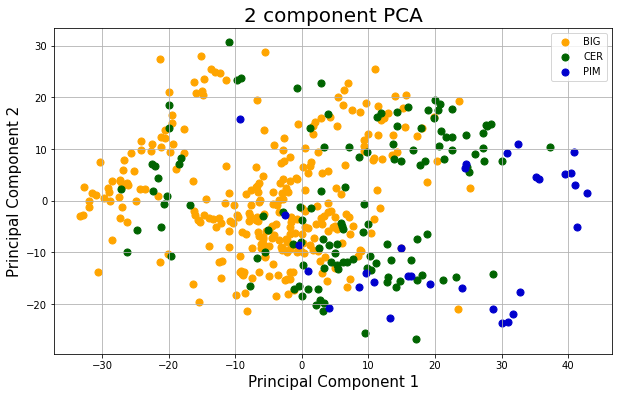

In [1222]:
#with sig metabolites between PIM and CER
X = avg_logged_data[sig_metabolites[:338]]
pca = PCA(n_components = 2)
prinC = pca.fit_transform(X)

plot_PCA(prinC)

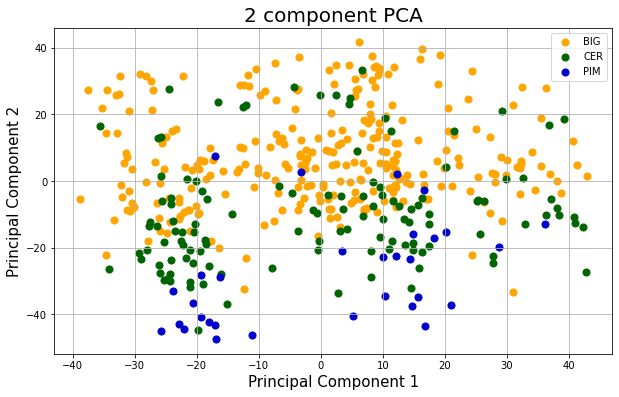

In [1224]:
X = avg_logged_data
from sklearn.decomposition import SparsePCA
# finding principle components
spca = SparsePCA(n_components=2)
spca.fit(X)
X_spca = spca.transform(X)
plot_PCA(X_spca)

In [1266]:
rep1_logged.shape

(442, 981)

In [1267]:
averaged = (rep1_logged.iloc[:, :980] + rep2_logged.iloc[:, :980])/2

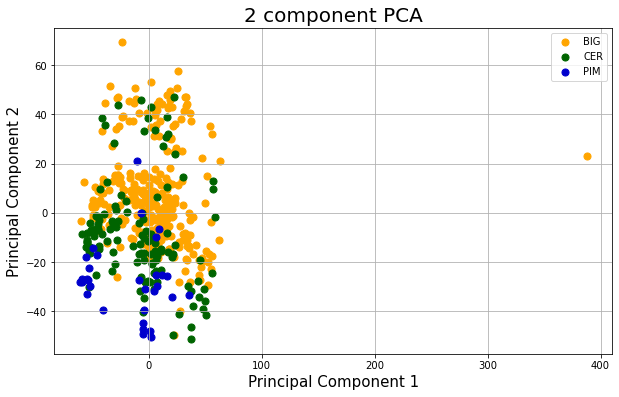

In [1269]:
X = averaged.fillna(0)
pca = PCA(n_components = 2)
prinC = pca.fit_transform(X)

plot_PCA(prinC)

In [1281]:
print(PIM.shape, CER.shape, BIG.shape)

(62, 983) (248, 983) (574, 983)
